# 1 - Importação de bibliotecas e funções

## Bibliotecas

In [65]:
import pandas as pd
import numpy as np
import researchpy as rp
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
import warnings
import pickle
import requests

import inflection
import math

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import sklearn.metrics as mt

from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc, roc_curve, accuracy_score, f1_score, roc_auc_score

from IPython.display import Image
from scipy import stats
from boruta import BorutaPy
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from tabulate import tabulate

## Funções

In [8]:
def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).to_numpy()
    n = cm.sum()
    r, k = cm.shape
    chi2 = stats.chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )

## Configurações

In [9]:
warnings.filterwarnings('ignore')

# 2 - Importação dos dados

In [10]:
df_raw = pd.read_csv ("C:\\Users\\victo\\repos\\comunidade_ds\\pa_health_insurance_cross_sell\\data\\raw\\train.csv")

# 3 - Descrição dos dados

In [11]:
df1 = df_raw.copy()

## Visualização

In [12]:
df1.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1


In [13]:
df1.tail(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [14]:
df1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

## Dimensões

In [15]:
df1.shape

(381109, 12)

## Tipos

In [16]:
df1.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

## NAs

In [17]:
df1.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## Duplicados

In [18]:
df1.duplicated(subset=['id']).sum()

0

## Estatísticas

### Variáveis numéricas

#### Medidas de tendência e dispersão

In [19]:
df1.select_dtypes(['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


#### Medidas de distribuição

In [20]:
df1.select_dtypes(['int64', 'float64']).skew()

id                      9.443274e-16
Age                     6.725390e-01
Driving_License        -2.159518e+01
Region_Code            -1.152664e-01
Previously_Insured      1.677471e-01
Annual_Premium          1.766087e+00
Policy_Sales_Channel   -9.000081e-01
Vintage                 3.029517e-03
Response                2.301906e+00
dtype: float64

In [21]:
df1.select_dtypes(['int64', 'float64']).kurtosis()

id                       -1.200000
Age                      -0.565655
Driving_License         464.354302
Region_Code              -0.867857
Previously_Insured       -1.971871
Annual_Premium           34.004569
Policy_Sales_Channel     -0.970810
Vintage                  -1.200688
Response                  3.298788
dtype: float64

### Variáveis categóricas

#### Medidas de frequência

In [22]:
df1.select_dtypes(['object']).describe().T

,count,unique,top,freq
Gender,381109,2,Male,206089
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413


# 4 - Tratamento dos dados

In [23]:
df2 = df1.copy()

## Renomeação de colunas

In [24]:
new_columns_name = ['id', 'gender', 'age', 'driving_license', 'region_code', 'previously_insured', 'vehicle_age', 
            'vehicle_damage', 'annual_premium', 'policy_sales_channel', 'vintage', 'response']

df2.columns = new_columns_name

# 5 - Mapa mental de hipóteses

## Mapa mental

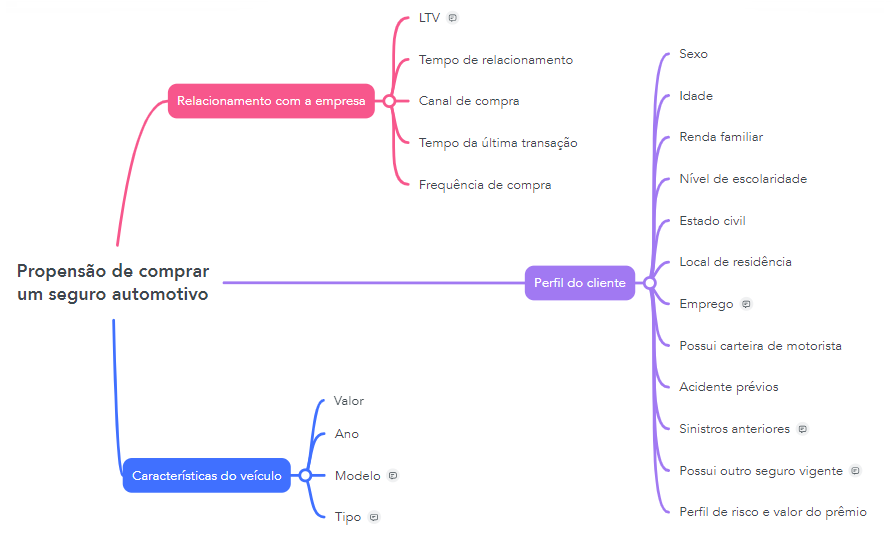

In [25]:
Image ("C:\\Users\\victo\\repos\\comunidade_ds\\pa_health_insurance_cross_sell\\reports\\figures\\mapa_mental_hipoteses.png")

## Hipóteses

### Perfil do cliente

**1.** Clientes do sexo masculino são mais propensos a comprar um seguro automotivo

**2.** Clientes mais velhos são mais propensos a comprar um seguro automotivo

**3.** Clientes com mais renda familiar são mais propensos a comprar um seguro automotivo

**4.** Clientes com maior nível de escolaridade são mais propensos a comprar um seguro automotivo

**5.** Clientes casados são mais propensos a comprar um seguro automotivo

**6.** Clientes que moram em determinados locais são mais propensos a comprar um seguro automotivo

**7.** Clientes que estão empregados são mais propensos a comprar um seguro automotivo

**8.** Clientes que possuem carteira de motorista são mais propensos a comprar um seguro automotivo

**9.** Clientes que já tiveram acidentes com veículos anteriormente são mais propensos a comprar um seguro automotivo

**10.** Clientes que já tiveram sinistros em seguro anteriormente são mais propensos a comprar um seguro automotivo

**11.** Clientes que já possuem um seguro automotivo vigente são menos propensos a comprar um seguro automotivo

**12.** Clientes com maior perfil de risco e maior prêmio anual são menos propensos a comprar um seguro automotivo

### Características do veículo

**1.** Clientes que possuem veículos de maior valor são mais propensos a comprar um seguro automotivo

**2.** Clientes que possuem veículos mais novos são mais propensos a comprar um seguro automotivo

**3.** Clientes que possuem veículo de modelos esporte são mais propensos a comprar um seguro automotivo

**4.** Clientes que possuem veículos de 2 rodas são mais propensos a comprar um seguro automotivo

### Relacionamento com a empresa

**1.** Clientes que geram mais receitas para a empresa são mais propensos a comprar um seguro automotivo

**2.** Clientes que possuem mais tempo de relacionamento com a empresa são mais propensos a comprar um seguro automotivo

**3.** Clientes que compram por um determinado tipo de canal são mais propensos a comprar um seguro automotivo

**4.** Clientes que compraram da empresa mais recentemente são mais propensos a comprar um seguro automotivo

**5.** Clientes que compram da empresa com mais frequência são mais propensos a comprar um seguro automotivo

## Lista de hipóteses verificáveis

**1.** Clientes do sexo masculino são mais propensos a comprar um seguro automotivo

**2.** Clientes mais velhos são mais propensos a comprar um seguro automotivo

**3.** Clientes que possuem carteira de motorista são mais propensos a comprar um seguro automotivo

**4.** Clientes que já tiveram acidentes com veículos anteriormente são mais propensos a comprar um seguro automotivo

**5.** Clientes que já possuem um seguro automotivo vigente são menos propensos a comprar um seguro automotivo

**6.** Clientes com maior perfil de risco e maior prêmio anual são menos propensos a comprar um seguro automotivo

**7.** Clientes que possuem veículos mais novos são mais propensos a comprar um seguro automotivo

**8.** Clientes que possuem mais tempo de relacionamento com a empresa são mais propensos a comprar um seguro automotivo

**9.** Clientes que compram por um determinado tipo de canal são mais propensos a comprar um seguro automotivo

## Conclusão

In [101]:
tab =[['Hipótese', 'Conclusão', 'Relevância'],
      
      ['Clientes do sexo masculino são mais propensos a comprar um seguro automotivo', 'Verdade', 'Baixa'],  
      
      ['Clientes mais velhos são mais propensos a comprar um seguro automotivo', 'Meia Verdade', 'Baixa'],  
      
      ['Clientes que possuem carteira de motorista são mais propensos a comprar um seguro automotivo', 'Verdade', 'Alta'],
      
      ['Clientes que já tiveram acidentes com veículos anteriormente são mais propensos a comprar um seguro automotivo', 'Verdade', 'Alta'],
      
      ['Clientes que já possuem um seguro automotivo vigente são menos propensos a comprar um seguro automotivo', 'Verdade', 'Alta'],
      
      ['Clientes com maior perfil de risco e maior prêmio anual são menos propensos a comprar um seguro automotivo', 'Inconclusivo', ''],
      
      ['Clientes que possuem veículos mais novos são mais propensos a comprar um seguro automotivo', 'Falso', 'Média'],
      
      ['Clientes que possuem mais tempo de relacionamento com a empresa são mais propensos a comprar um seguro automotivo', 'Falso', 'Baixa'],
      
      ['Clientes que compram por um determinado tipo de canal são mais propensos a comprar um seguro automotivo', 'Inconclusivo', ''],
     ]  
print( tabulate( tab, headers='firstrow', tablefmt="fancy_grid", maxcolwidths=[80] ) )

╒═════════════════════════════════════════════════════════════════════════════════╤══════════════╤══════════════╕
│ Hipótese                                                                        │ Conclusão    │ Relevância   │
╞═════════════════════════════════════════════════════════════════════════════════╪══════════════╪══════════════╡
│ Clientes do sexo masculino são mais propensos a comprar um seguro automotivo    │ Verdade      │ Baixa        │
├─────────────────────────────────────────────────────────────────────────────────┼──────────────┼──────────────┤
│ Clientes mais velhos são mais propensos a comprar um seguro automotivo          │ Meia Verdade │ Baixa        │
├─────────────────────────────────────────────────────────────────────────────────┼──────────────┼──────────────┤
│ Clientes que possuem carteira de motorista são mais propensos a comprar um      │ Verdade      │ Alta         │
│ seguro automotivo                                                               │     

# 6 - Engenharia de features

In [26]:
df3 = df2.copy()

## Derivação

## Criação

# 7 - Análise exploratória dos dados

In [27]:
df4 = df3.copy()

## Hipóteses

**1.** Clientes do sexo masculino são mais propensos a comprar um seguro automotivo

**2.** Clientes mais velhos são mais propensos a comprar um seguro automotivo

**3.** Clientes que possuem carteira de motorista são mais propensos a comprar um seguro automotivo

**4.** Clientes que já tiveram acidentes com veículos anteriormente são mais propensos a comprar um seguro automotivo

**5.** Clientes que já possuem um seguro automotivo vigente são menos propensos a comprar um seguro automotivo

**6.** Clientes com maior perfil de risco e maior prêmio anual são menos propensos a comprar um seguro automotivo

**7.** Clientes que possuem veículos mais novos são mais propensos a comprar um seguro automotivo

**8.** Clientes que possuem mais tempo de relacionamento com a empresa são mais propensos a comprar um seguro automotivo

**9.** Clientes que compram por um determinado tipo de canal são mais propensos a comprar um seguro automotivo

## Análise univariada

### Variável resposta

<Axes: xlabel='response', ylabel='count'>

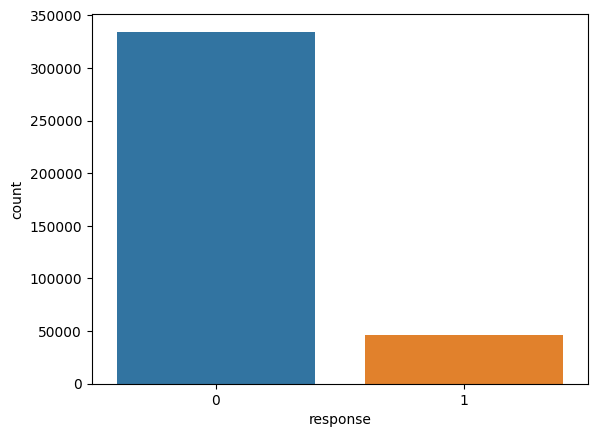

In [28]:
sns.countplot( x=df4['response'] )

### Variáveis numéricas

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Driving_License'}>],
       [<Axes: title={'center': 'Region_Code'}>,
        <Axes: title={'center': 'Previously_Insured'}>,
        <Axes: title={'center': 'Annual_Premium'}>],
       [<Axes: title={'center': 'Policy_Sales_Channel'}>,
        <Axes: title={'center': 'Vintage'}>,
        <Axes: title={'center': 'Response'}>]], dtype=object)

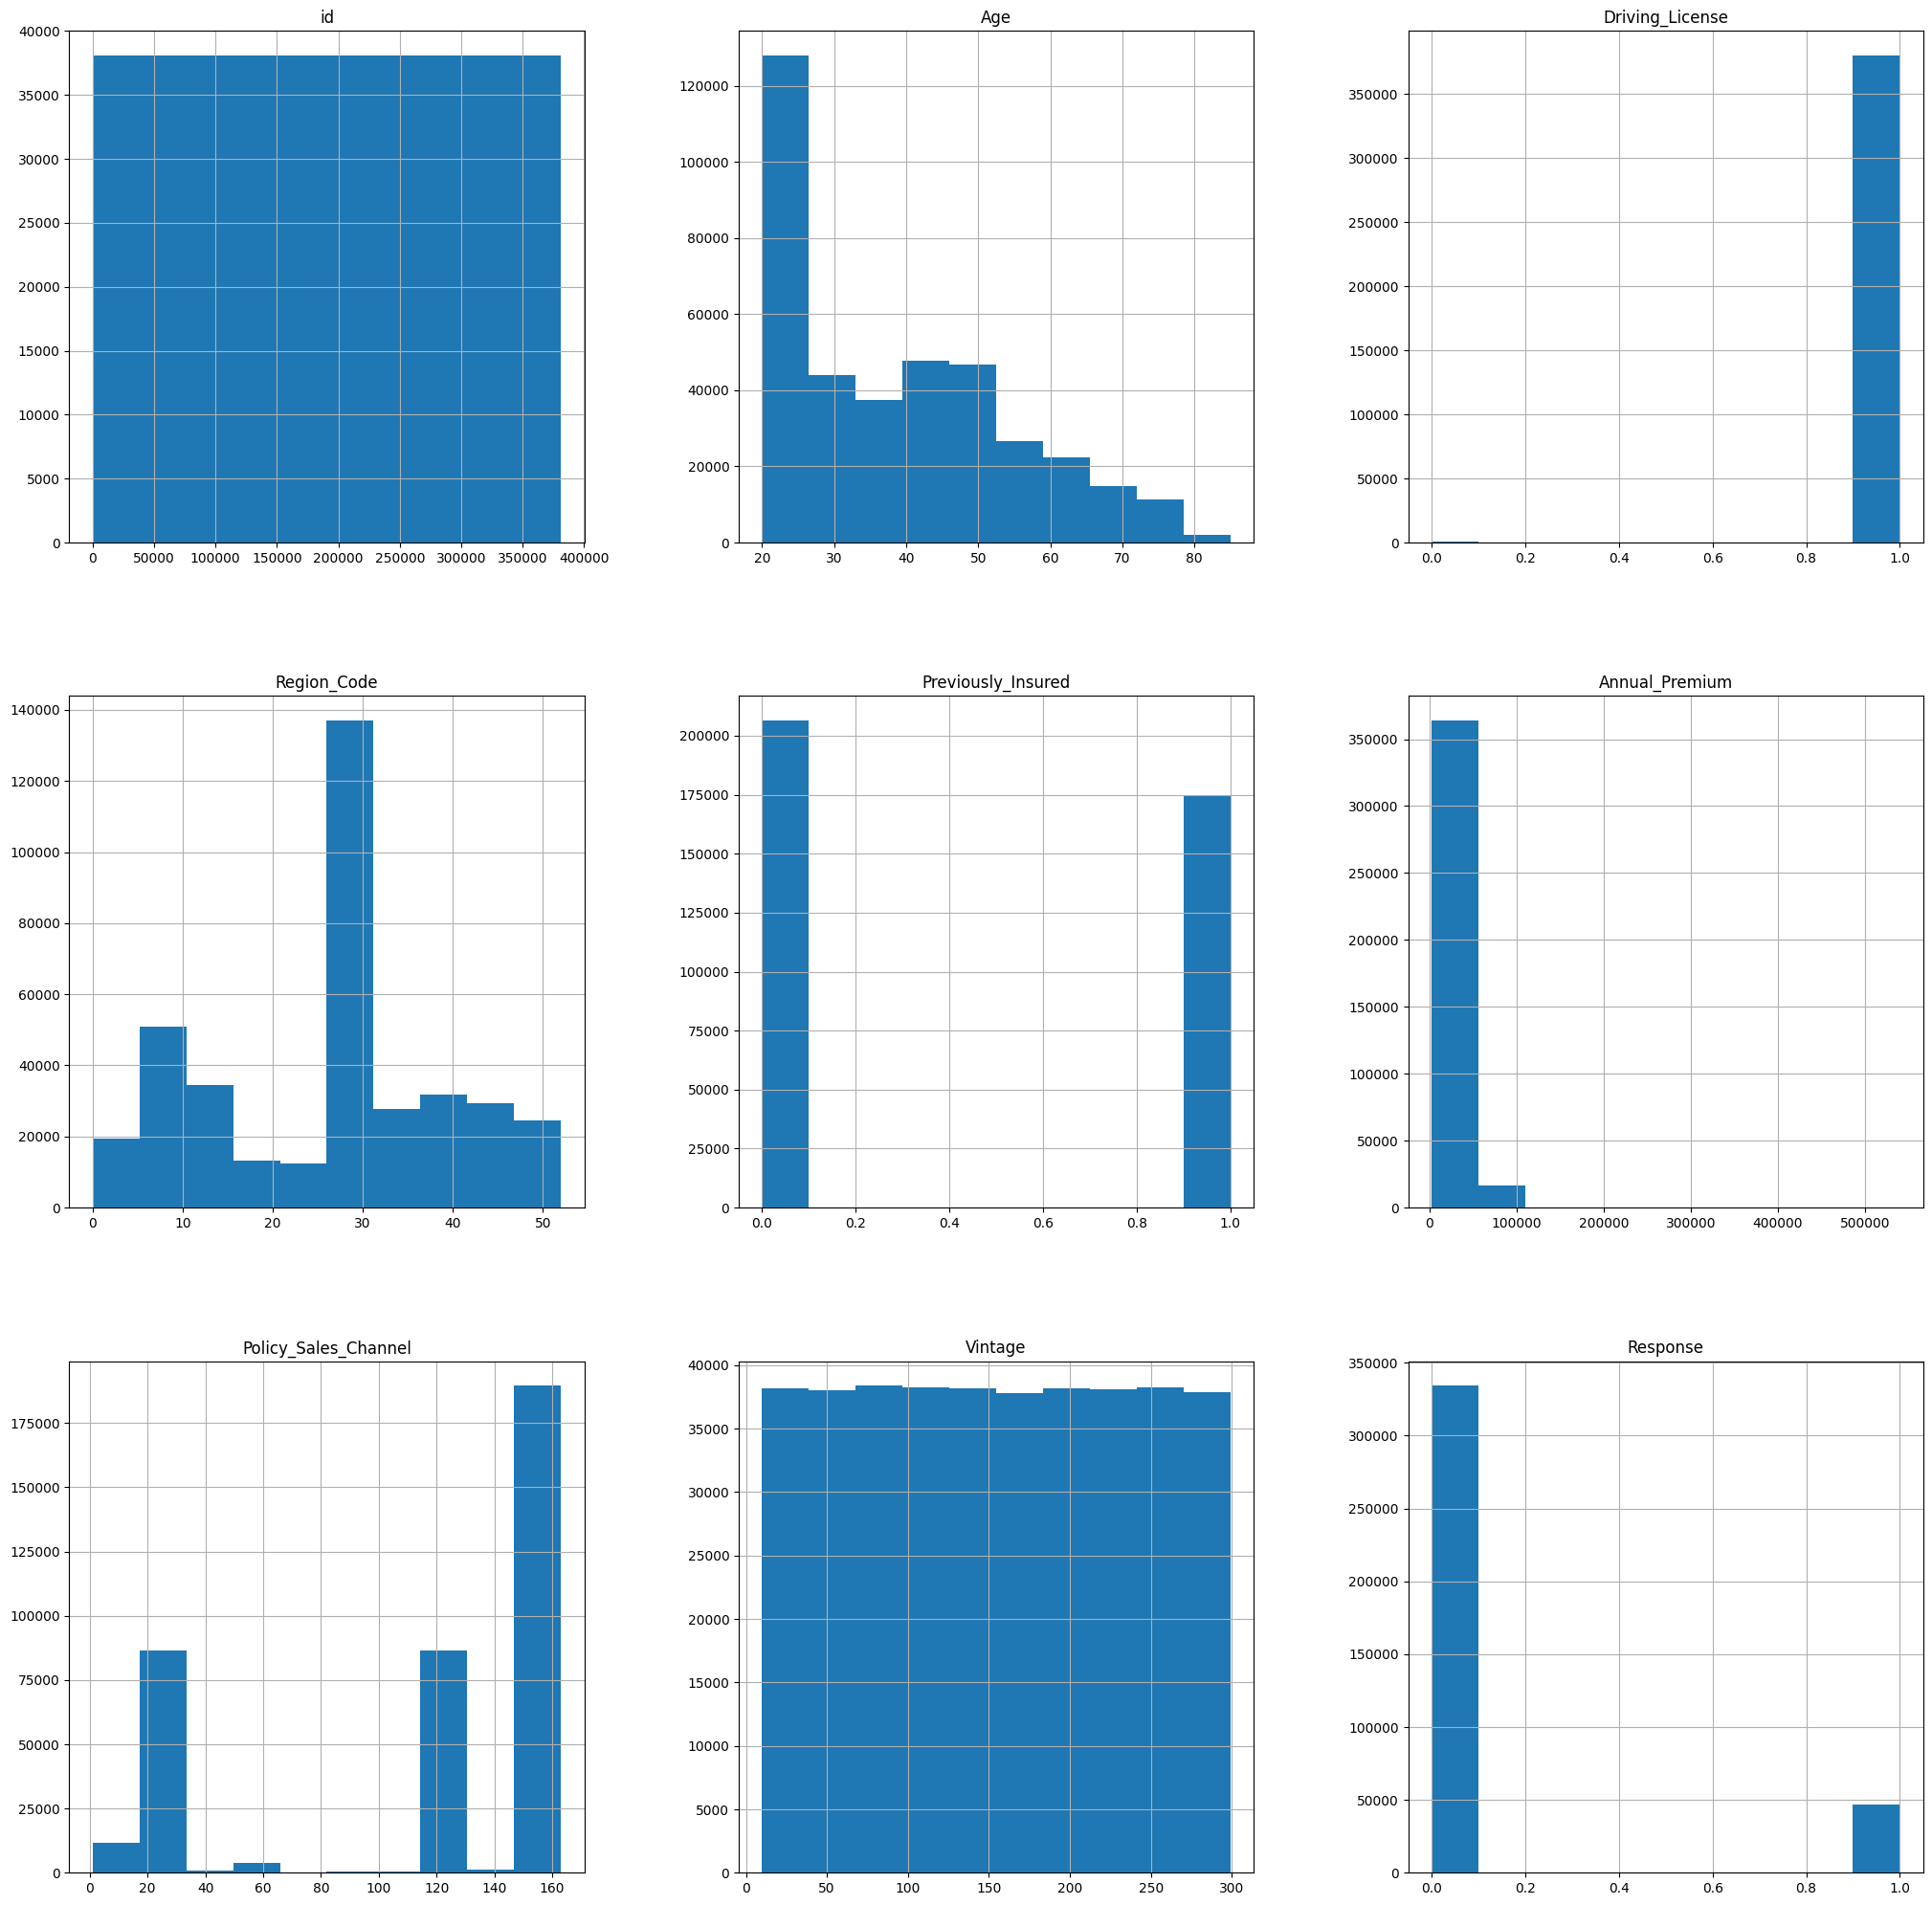

In [934]:
df1.select_dtypes(['int64', 'float64']).hist(figsize=[25,25])

<Axes: >

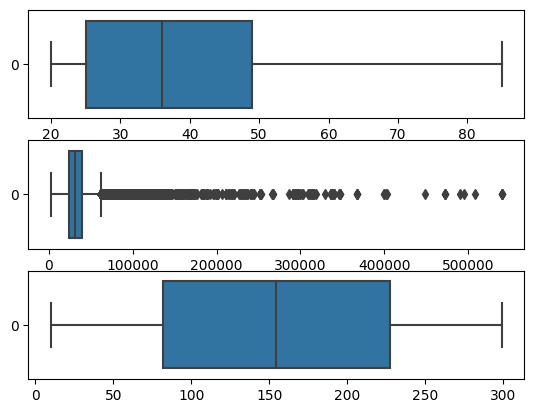

In [935]:
plt.subplot( 3, 1, 1 )
sns.boxplot(data=df1["Age"], orient="h")

plt.subplot( 3, 1, 2 )
sns.boxplot(data=df1["Annual_Premium"], orient="h")

plt.subplot( 3, 1, 3 )
sns.boxplot(data=df1["Vintage"], orient="h")

### Variáveis categóricas

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

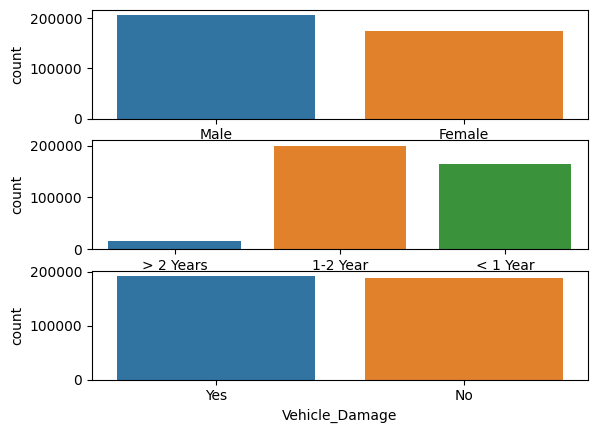

In [936]:
plt.subplot( 3, 1, 1 )
sns.countplot( x=df1['Gender'] )

plt.subplot( 3, 1, 2 )
sns.countplot( x=df1['Vehicle_Age'] )

plt.subplot( 3, 1, 3 )
sns.countplot( x=df1['Vehicle_Damage'] )

## Análise bivariada

### Clientes do sexo masculino são mais propensos a comprar um seguro automotivo

**VERDADE** clientes do sexo masculino são MAIS PROPENSOS a comprar um seguro automotivo

In [213]:
aux1 = df4.loc[:, ['gender', 'response']].groupby('gender').sum('response').reset_index()
aux2 = df4.loc[:, ['gender', 'response']].groupby('gender').count().rename(columns={'response': 'total'}).reset_index()
aux3 = aux1.merge(aux2, how='inner')
aux3['prob'] = ( aux3['response'] / aux3['total'] ) * 100
aux3

,gender,response,total,prob
0,Female,18185,175020,10.390241
1,Male,28525,206089,13.841107


<Axes: xlabel='gender', ylabel='prob'>

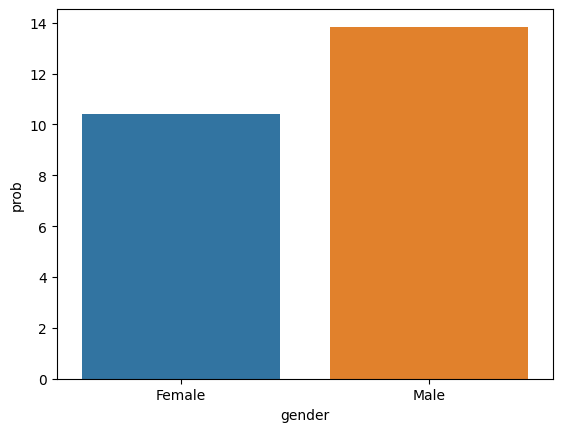

In [215]:
sns.barplot(data=aux3, x='gender', y='prob')

### Clientes mais velhos são mais propensos a comprar um seguro automotivo

**MEIA VERDADE** clientes mais velhos são MAIS PROPENSOS a comprar um seguro automotivo porém apenas ATÉ UMA CERTA IDADE

In [218]:
aux1 = df4.loc[:, ['age', 'response']].groupby('age').sum('response').reset_index()
aux2 = df4.loc[:, ['age', 'response']].groupby('age').count().rename(columns={'response': 'total'}).reset_index()
aux3 = aux1.merge(aux2, how='inner')
aux3['prob'] = ( aux3['response'] / aux3['total'] ) * 100
aux3

,age,response,total,prob
0,20,171,6232,2.743902
1,21,574,16457,3.487877
2,22,763,20964,3.639573
3,23,892,24256,3.677441
4,24,913,25960,3.516949
...,...,...,...,...
61,81,4,56,7.142857
62,82,1,29,3.448276
63,83,1,22,4.545455
64,84,0,11,0.000000


<Axes: xlabel='age', ylabel='prob'>

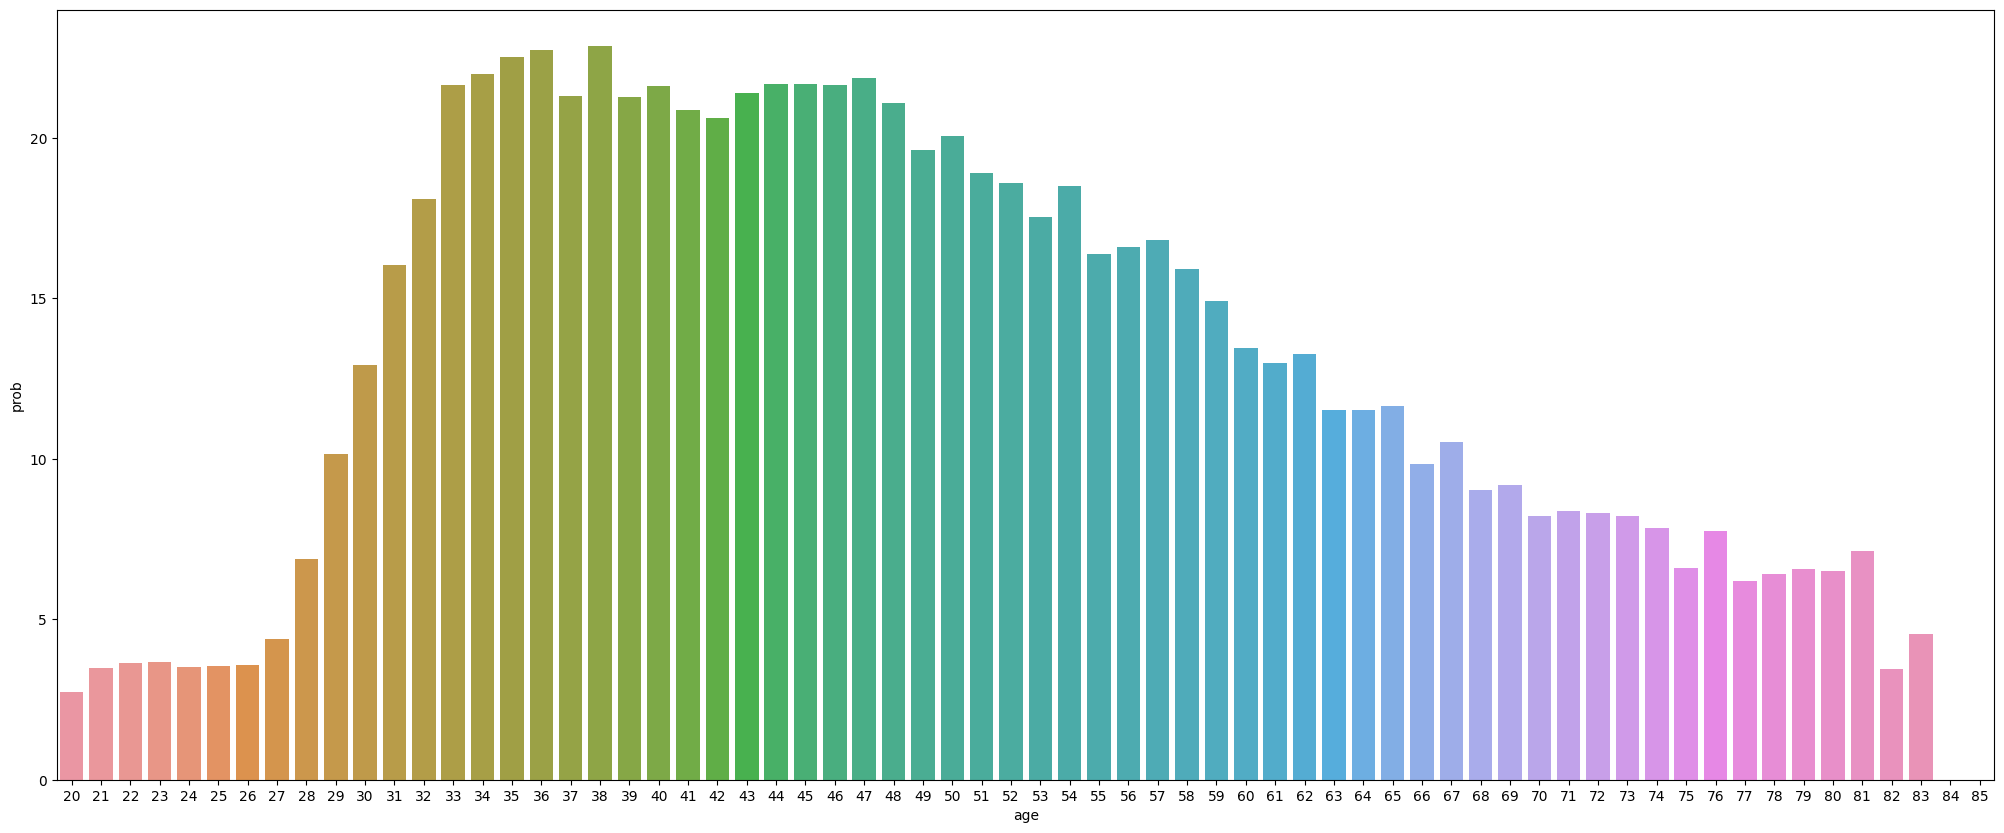

In [240]:
plt.figure(figsize=(25,10))
sns.barplot(data=aux3, x='age', y='prob')

### Clientes que possuem carteira de motorista são mais propensos a comprar um seguro automotivo

**VERDADE** clientes que possuem carteira de motorista são MAIS PROPENSOS a comprar um seguro automotivo

In [243]:
aux1 = df4.loc[:, ['driving_license', 'response']].groupby('driving_license').sum('response').reset_index()
aux2 = df4.loc[:, ['driving_license', 'response']].groupby('driving_license').count().rename(columns={'response': 'total'}).reset_index()
aux3 = aux1.merge(aux2, how='inner')
aux3['prob'] = ( aux3['response'] / aux3['total'] ) * 100
aux3

,driving_license,response,total,prob
0,0,41,812,5.049261
1,1,46669,380297,12.271724


<Axes: xlabel='driving_license', ylabel='prob'>

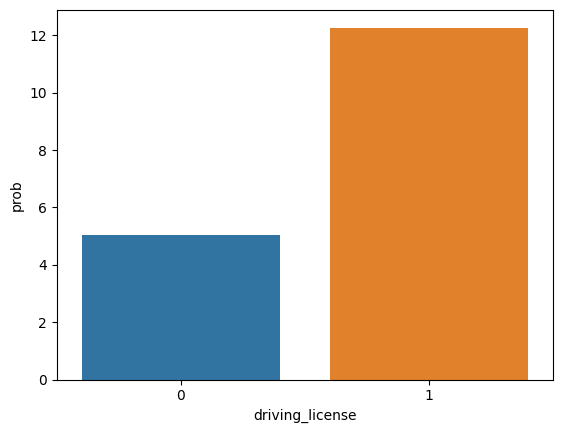

In [246]:
sns.barplot(data=aux3, x='driving_license', y='prob')

### Clientes que já tiveram acidentes com veículos anteriormente são mais propensos a comprar um seguro automotivo

**VERDADE** clientes que já tiveram acidentes com veículos anteriormente são MUITO MAIS PROPENSOS a comprar um seguro automotivo

In [310]:
aux1 = df4.loc[:, ['vehicle_damage', 'response']].groupby('vehicle_damage').sum('response').reset_index()
aux2 = df4.loc[:, ['vehicle_damage', 'response']].groupby('vehicle_damage').count().rename(columns={'response': 'total'}).reset_index()
aux3 = aux1.merge(aux2, how='inner')
aux3['prob'] = ( aux3['response'] / aux3['total'] ) * 100
aux3

,vehicle_damage,response,total,prob
0,No,982,188696,0.520414
1,Yes,45728,192413,23.765546


<Axes: xlabel='vehicle_damage', ylabel='prob'>

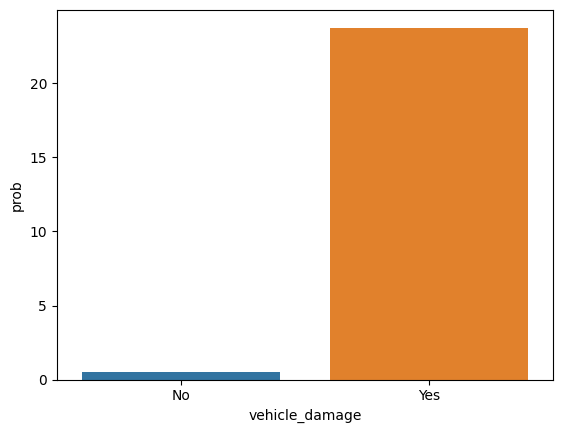

In [311]:
sns.barplot(data=aux3, x='vehicle_damage', y='prob')

### Clientes que já possuem um seguro automotivo vigente são menos propensos a comprar um seguro automotivo

**VERDADE** clientes que já possuem um seguro automotivo são MUITO MENOS PROPENSOS a comprar um seguro automotivo

In [314]:
aux1 = df4.loc[:, ['previously_insured', 'response']].groupby('previously_insured').sum('response').reset_index()
aux2 = df4.loc[:, ['previously_insured', 'response']].groupby('previously_insured').count().rename(columns={'response': 'total'}).reset_index()
aux3 = aux1.merge(aux2, how='inner')
aux3['prob'] = ( aux3['response'] / aux3['total'] ) * 100
aux3

,previously_insured,response,total,prob
0,0,46552,206481,22.545416
1,1,158,174628,0.090478


<Axes: xlabel='previously_insured', ylabel='prob'>

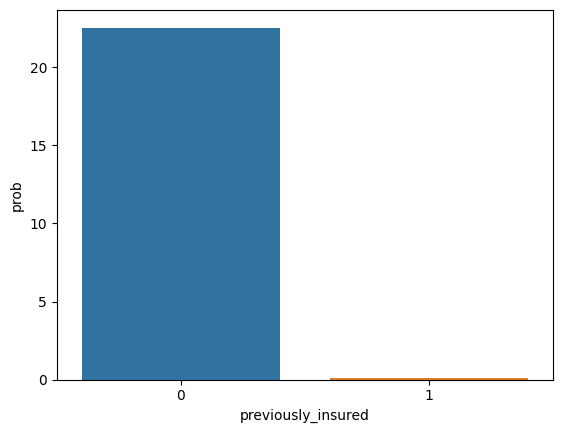

In [330]:
sns.barplot(data=aux3, x='previously_insured', y='prob')

### Clientes com maior perfil de risco e maior prêmio anual são menos propensos a comprar um seguro automotivo

**INCONCLUSIVO** não é possível analisar se clientes com maior perfil de risco e maior prêmio anual são menos propensos a comprar um seguro automotivo

In [378]:
aux1 = df4.loc[:, ['annual_premium', 'response']].groupby('annual_premium').sum('response').reset_index()
aux2 = df4.loc[:, ['annual_premium', 'response']].groupby('annual_premium').count().rename(columns={'response': 'total'}).reset_index()
aux3 = aux1.merge(aux2, how='inner')
aux3['prob'] = ( aux3['response'] / aux3['total'] ) * 100
aux3

,annual_premium,response,total,prob
0,2630.0,8505,64877,13.109422
1,6098.0,0,1,0.000000
2,7670.0,0,1,0.000000
3,8739.0,0,1,0.000000
4,9792.0,0,1,0.000000
...,...,...,...,...
48833,472042.0,2,3,66.666667
48834,489663.0,1,1,100.000000
48835,495106.0,0,1,0.000000
48836,508073.0,0,1,0.000000


<Axes: xlabel='annual_premium', ylabel='prob'>

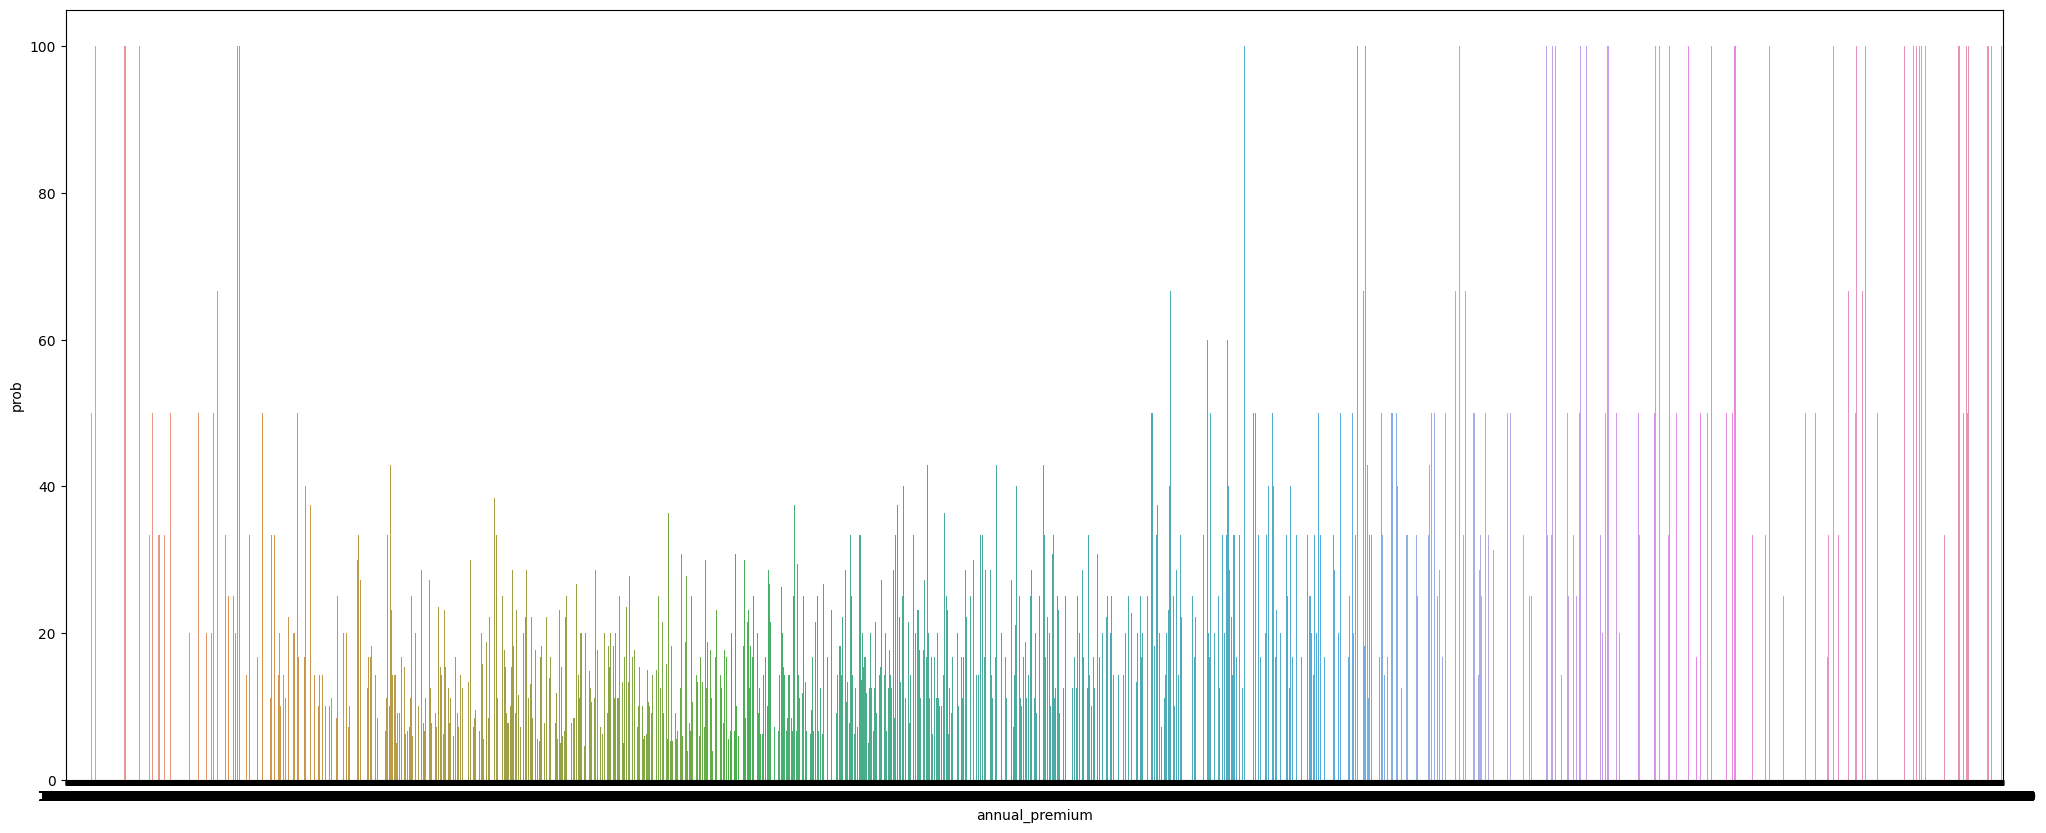

In [374]:
plt.figure(figsize=(25,10))
sns.barplot(data=aux3, x='annual_premium', y='prob')

### Clientes que possuem veículos mais novos são mais propensos a comprar um seguro automotivo

**FALSO** clientes que possuem veículos mais novos são MENOS PROPENSOS a comprar um seguro automotivo

In [345]:
aux1 = df4.loc[:, ['vehicle_age', 'response']].groupby('vehicle_age').sum('response').reset_index()
aux2 = df4.loc[:, ['vehicle_age', 'response']].groupby('vehicle_age').count().rename(columns={'response': 'total'}).reset_index()
aux3 = aux1.merge(aux2, how='inner')
aux3['prob'] = ( aux3['response'] / aux3['total'] ) * 100
aux3

,vehicle_age,response,total,prob
0,1-2 Year,34806,200316,17.375547
1,< 1 Year,7202,164786,4.370517
2,> 2 Years,4702,16007,29.374649


<Axes: xlabel='vehicle_age', ylabel='prob'>

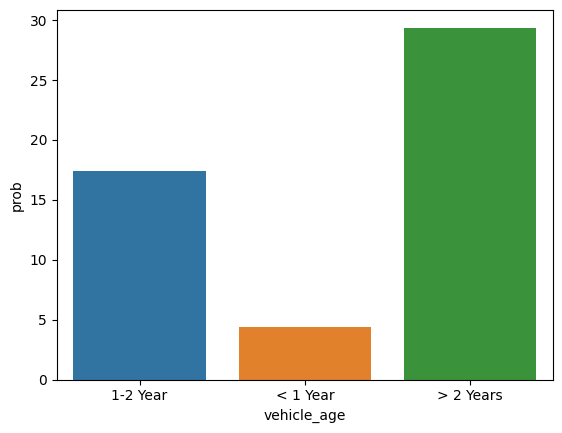

In [346]:
sns.barplot(data=aux3, x='vehicle_age', y='prob')

### Clientes que possuem mais tempo de relacionamento com a empresa são mais propensos a comprar um seguro automotivo

**FALSO** clientes com mais e menos tempo de relacionamento com a empresa parecem IGUALMENTE PROPENSOS a comprar um seguro automotivo

In [361]:
aux1 = df4.loc[:, ['vintage', 'response']].groupby('vintage').sum('response').reset_index()
aux2 = df4.loc[:, ['vintage', 'response']].groupby('vintage').count().rename(columns={'response': 'total'}).reset_index()
aux3 = aux1.merge(aux2, how='inner')
aux3['prob'] = ( aux3['response'] / aux3['total'] ) * 100
aux3

,vintage,response,total,prob
0,10,147,1311,11.212815
1,11,191,1344,14.211310
2,12,165,1257,13.126492
3,13,184,1329,13.844996
4,14,156,1260,12.380952
...,...,...,...,...
285,295,157,1275,12.313725
286,296,156,1302,11.981567
287,297,142,1284,11.059190
288,298,186,1384,13.439306


<Axes: xlabel='vintage', ylabel='prob'>

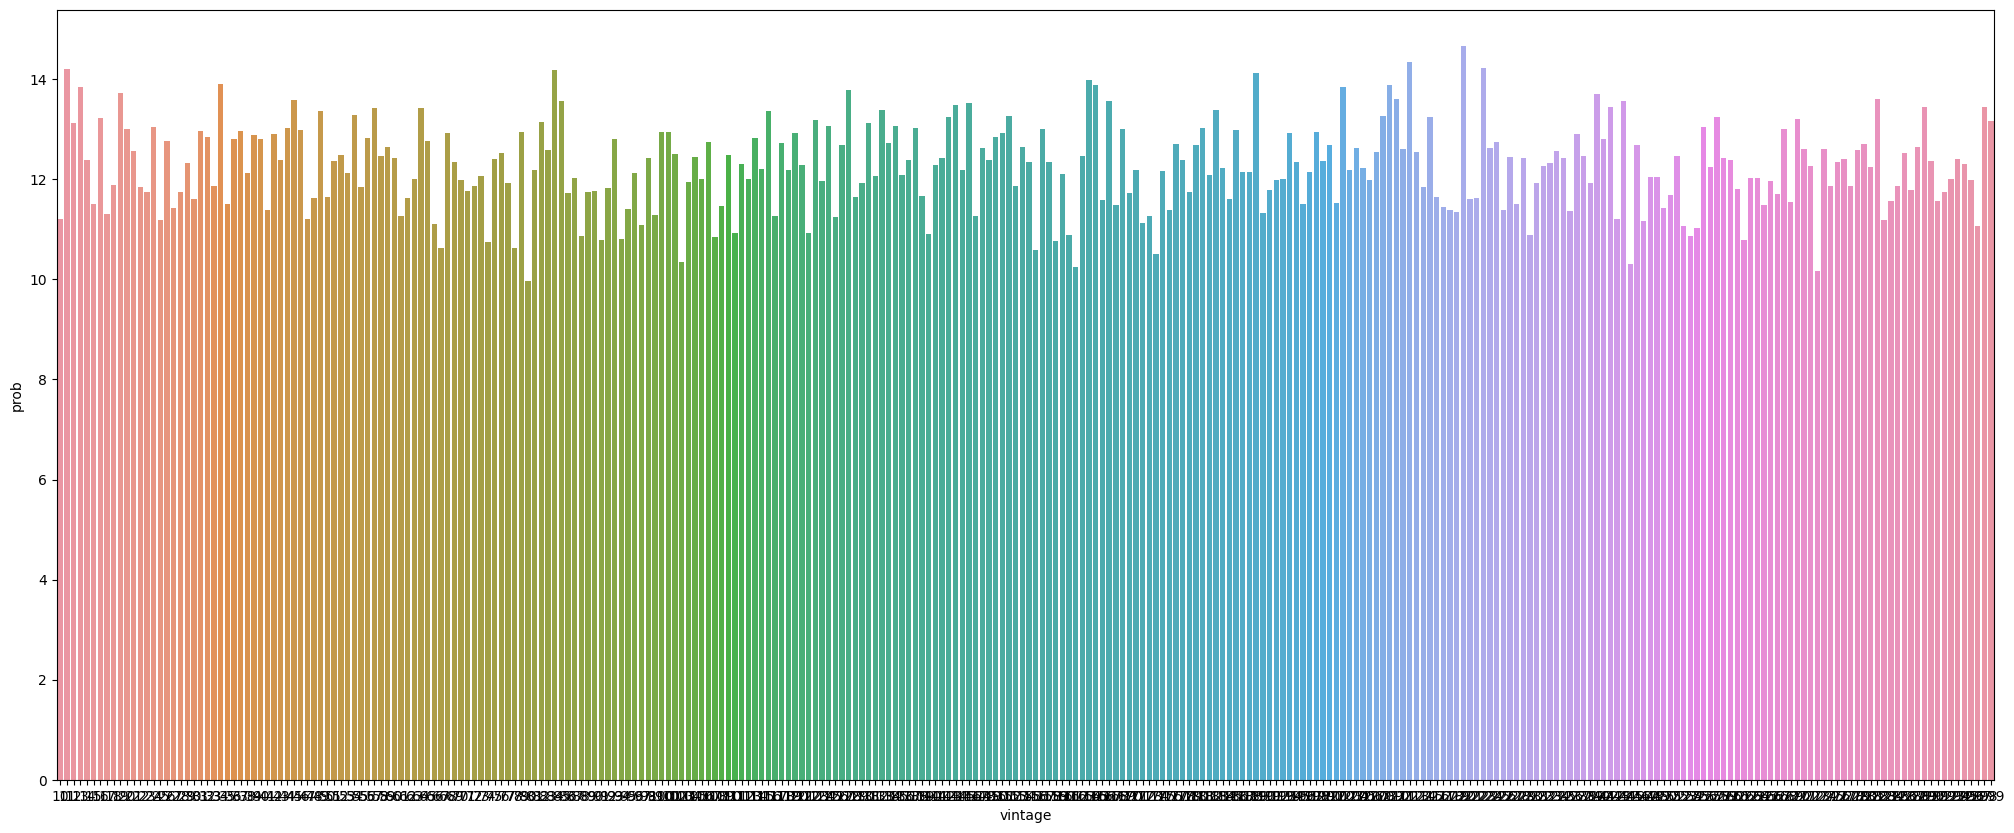

In [362]:
plt.figure(figsize=(25,10))
sns.barplot(data=aux3, x='vintage', y='prob')

### Clientes que compram por um determinado tipo de canal são mais propensos a comprar um seguro automotivo

**INCONCLUSIVO** parece haver uma propensão similar a compra de um seguro automotivo entre os diferentes tipos de canais de vendas

In [394]:
aux1 = df4.loc[:, ['policy_sales_channel', 'response']].groupby('policy_sales_channel').sum('response').reset_index()
aux2 = df4.loc[:, ['policy_sales_channel', 'response']].groupby('policy_sales_channel').count().rename(columns={'response': 'total'}).reset_index()
aux3 = aux1.merge(aux2, how='inner')
aux3['prob'] = ( aux3['response'] / aux3['total'] ) * 100
aux3

,policy_sales_channel,response,total,prob
0,1.0,35,1074,3.258845
1,2.0,1,4,25.000000
2,3.0,159,523,30.401530
3,4.0,102,509,20.039293
4,6.0,0,3,0.000000
...,...,...,...,...
150,157.0,1794,6684,26.840215
151,158.0,135,492,27.439024
152,159.0,1,51,1.960784
153,160.0,475,21779,2.181000


<Axes: xlabel='policy_sales_channel', ylabel='prob'>

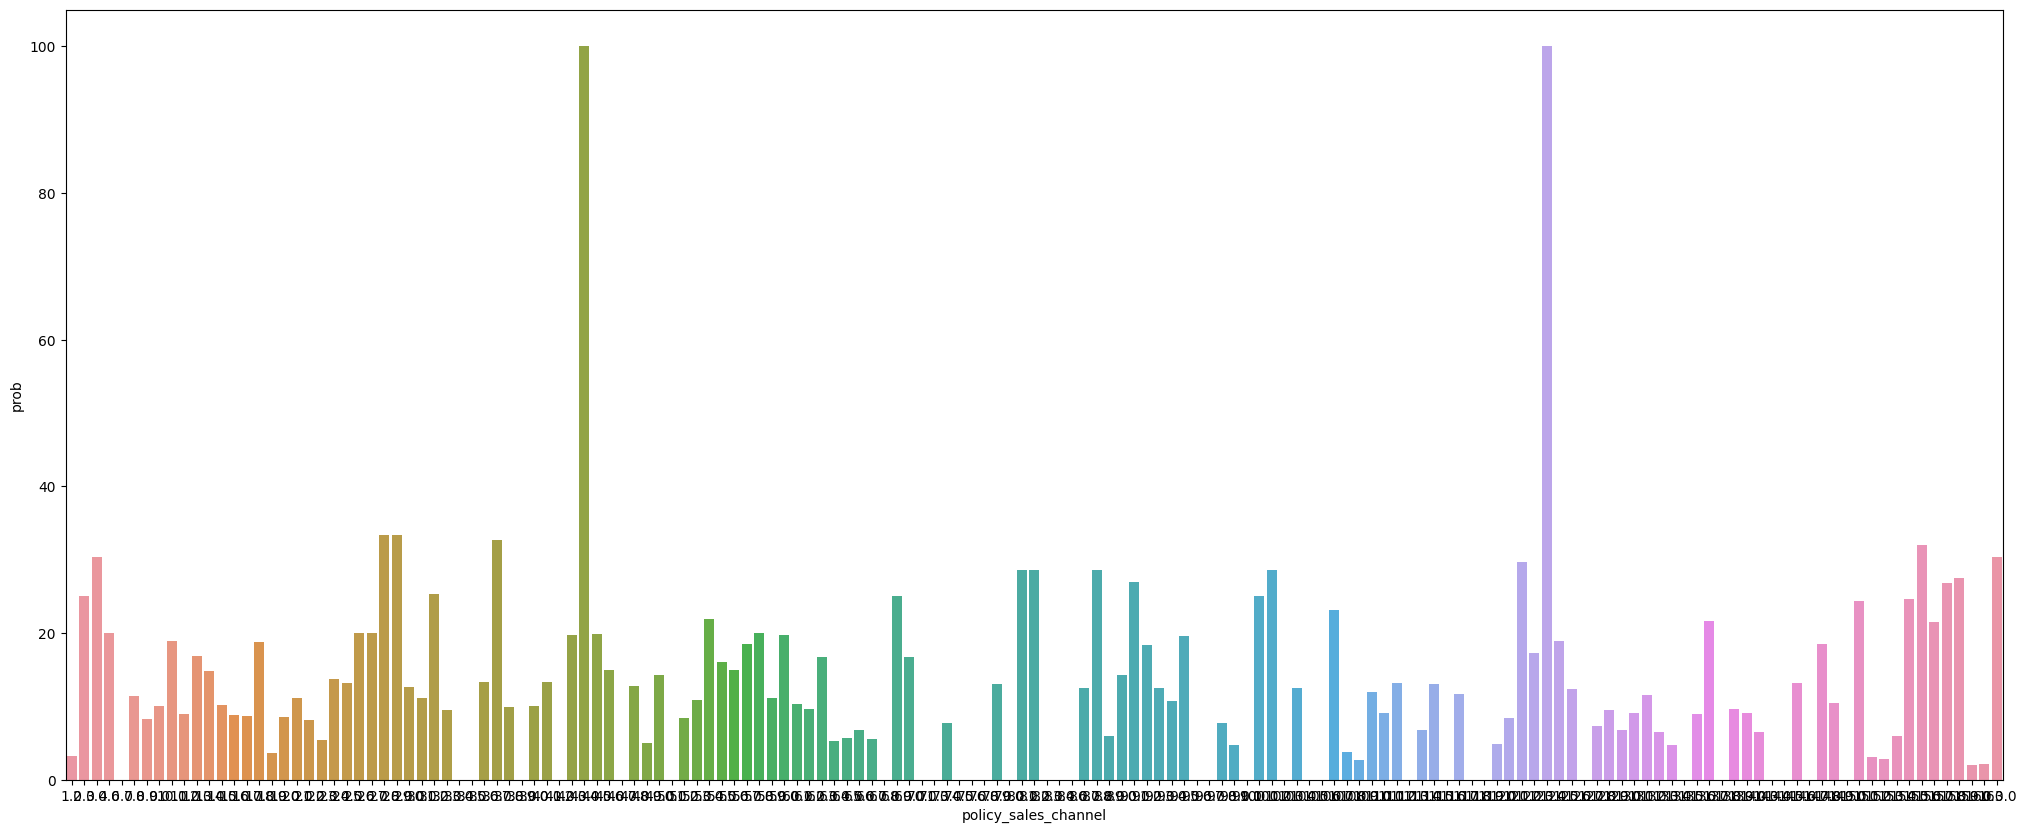

In [399]:
plt.figure(figsize=(25,10))
sns.barplot(data=aux3, x='policy_sales_channel', y='prob')

## Análise multivariada

### Variáveis numéricas

In [937]:
df_corr = df4.select_dtypes(['int64', 'float64']).corr()
df_corr

,id,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
driving_license,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
region_code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
previously_insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
annual_premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
policy_sales_channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


<Axes: >

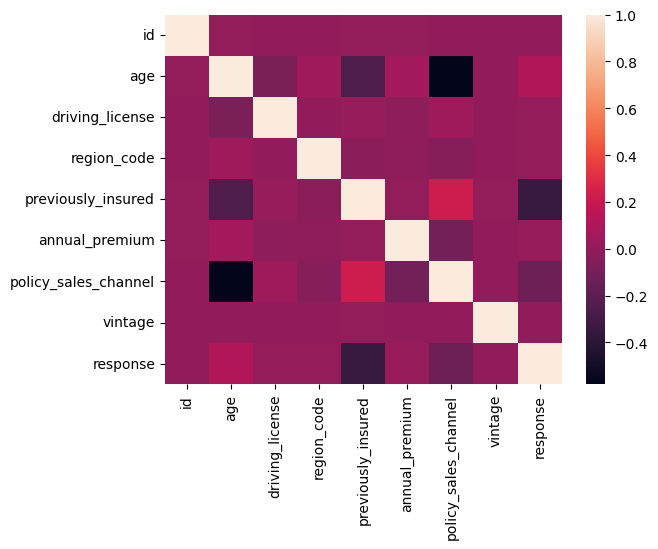

In [938]:
sns.heatmap(df_corr)

In [381]:
df4.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


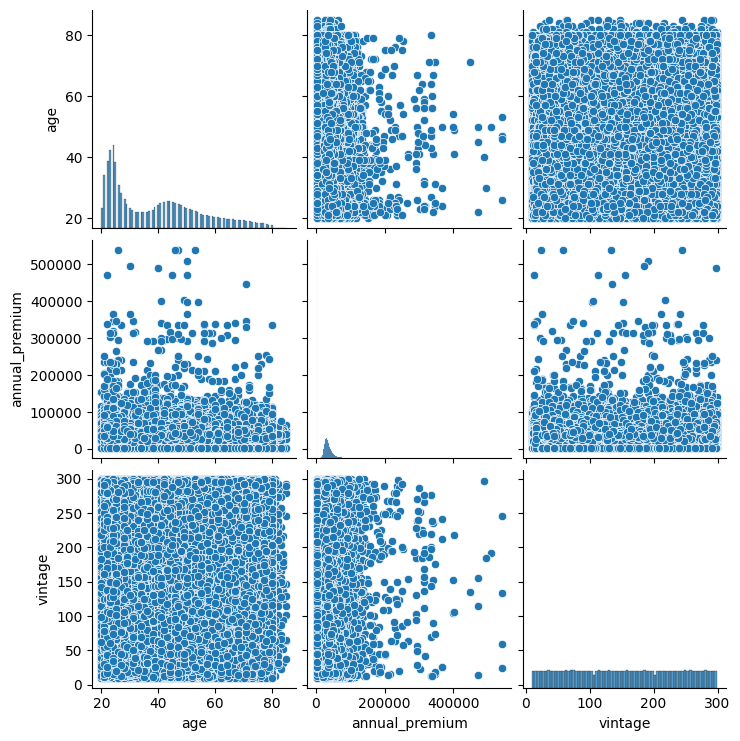

In [382]:
sns.pairplot(df4, vars=["age", "annual_premium", "vintage"])

### Variáveis categóricas

<Axes: >

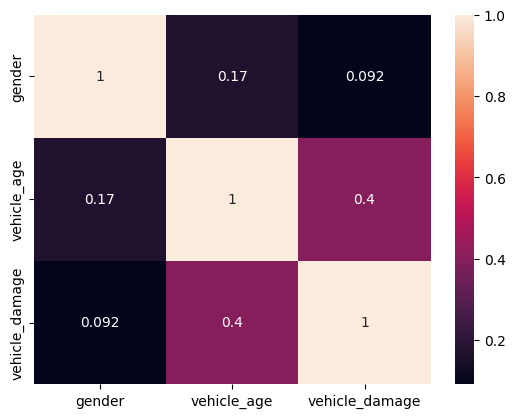

In [939]:
a = df4.select_dtypes( include='object' )

a1 = cramer_v( a['gender'], a['gender'] )
a2 = cramer_v( a['gender'], a['vehicle_age'] )
a3 = cramer_v( a['gender'], a['vehicle_damage'] )

a4 = cramer_v( a['vehicle_age'], a['gender'] )
a5 = cramer_v( a['vehicle_age'], a['vehicle_age'] )
a6 = cramer_v( a['vehicle_age'], a['vehicle_damage'] )

a7 = cramer_v( a['vehicle_damage'], a['gender'] )
a8 = cramer_v( a['vehicle_damage'], a['vehicle_age'] )
a9 = cramer_v( a['vehicle_damage'], a['vehicle_damage'] )

d = pd.DataFrame( {'gender': [a1, a2, a3],
                    'vehicle_age': [a4, a5, a6],
                    'vehicle_damage': [a7, a8, a9] })

d = d.set_index( d.columns )

sns.heatmap( d, annot=True )

# 8 - Preparação dos dados

In [37]:
df5 = df4.copy()

## Separação treino e validação

In [38]:
#Separação das colunas das variáveis independentes

x = df5[['id','gender','age','driving_license','region_code','previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium', 'policy_sales_channel', 'vintage']]


#Separação da coluna da variável resposta

y = df5[['response']]


#Separação do conjunto de dados em treino e validação

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.20, stratify=y, random_state=42)


#Criação do dataframe de treino e validação 

df_train = pd.concat( [x_train, y_train], axis=1 )
df_val = pd.concat( [x_val, y_val], axis=1 )


#Verificação do shape do conjunto de dados de treino e validação

print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(304887, 11) (76222, 11) (304887, 1) (76222, 1)


## Filtragem e seleção

### Treino

In [39]:
# df_train = df_train.drop(columns='id')

### Validação

In [40]:
# df_val = df_val.drop(columns='id')

## Codificação

### Treino

In [41]:
ohe = OneHotEncoder(drop="first")
oe = OrdinalEncoder(categories=[["< 1 Year", "1-2 Year", "> 2 Years"]])

In [42]:
#Codificação da variável "gender" com o método mean encoding

gender_mean_encoding = df_train.groupby(['gender'])['response'].mean().to_dict()
  
df_train['gender'] =  df_train['gender'].map(gender_mean_encoding)


#Codificação da variável "vehicle_damage" com o método mean encoding

vehicle_damage_mean_encoding = df_train.groupby(['vehicle_damage'])['response'].mean().to_dict()
  
df_train['vehicle_damage'] =  df_train['vehicle_damage'].map(vehicle_damage_mean_encoding)


#Codificação da variável "vehicle_age" com o método mean encoding

df_train["vehicle_age"] = oe.fit_transform(df_train[["vehicle_age"]])


#Codificação da variável "region_code" com o método mean encoding

region_code_mean_encoding = df_train.groupby(['region_code'])['response'].mean().to_dict()
  
df_train['region_code'] =  df_train['region_code'].map(region_code_mean_encoding)


#Codificação da variável "policy_sales_channel" com o método mean encoding

policy_sales_channel_mean_encoding = df_train.groupby(['policy_sales_channel'])['response'].mean().to_dict()
  
df_train['policy_sales_channel'] =  df_train['policy_sales_channel'].map(policy_sales_channel_mean_encoding)

### Validação

In [43]:
#Codificação da variável "gender" com o método mean encoding

gender_mean_encoding = df_val.groupby(['gender'])['response'].mean().to_dict()
  
df_val['gender'] =  df_val['gender'].map(gender_mean_encoding)


#Codificação da variável "vehicle_damage" com o método mean encoding

vehicle_damage_mean_encoding = df_val.groupby(['vehicle_damage'])['response'].mean().to_dict()
  
df_val['vehicle_damage'] =  df_val['vehicle_damage'].map(vehicle_damage_mean_encoding)


#Codificação da variável "vehicle_age" com o método ordinal encoding

df_val["vehicle_age"] = oe.fit_transform(df_val[["vehicle_age"]])


#Codificação da variável "region_code" com o método mean encoding

region_code_mean_encoding = df_val.groupby(['region_code'])['response'].mean().to_dict()
  
df_val['region_code'] =  df_val['region_code'].map(region_code_mean_encoding)


#Codificação da variável "policy_sales_channel" com o método mean encoding

policy_sales_channel_mean_encoding = df_val.groupby(['policy_sales_channel'])['response'].mean().to_dict()
  
df_val['policy_sales_channel'] =  df_val['policy_sales_channel'].map(policy_sales_channel_mean_encoding)

## Reescala

In [44]:
mms_age = MinMaxScaler()
mms_annual_premium = MinMaxScaler()
mms_vintage = MinMaxScaler()

### Treino

In [45]:
#Reescala da variável "age" com o método minmaxscaler

df_train["age"] = mms_age.fit_transform(df_train[["age"]])


#Reescala da variável "annual_premium" com o método minmaxscaler

df_train["annual_premium"] = mms_annual_premium.fit_transform(df_train[["annual_premium"]])


#Reescala da variável "vintage" com o método minmaxscaler

df_train["vintage"] = mms_vintage.fit_transform(df_train[["vintage"]])

### Validação

In [46]:
#Reescala da variável "age" com o método minmaxscaler

df_val["age"] = mms_age.fit_transform(df_val[["age"]])


#Reescala da variável "annual_premium" com o método minmaxscaler

df_val["annual_premium"] = mms_annual_premium.fit_transform(df_val[["annual_premium"]])


#Reescala da variável "vintage" com o método minmaxscaler

df_val["vintage"] = mms_vintage.fit_transform(df_val[["vintage"]])

## Transformação de natureza

## Preparação das variáveis de treino e validação

### Treino

In [47]:
x_train = df_train[['gender','age','driving_license','region_code','previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium', 'policy_sales_channel', 'vintage']]
y_train = df_train[['response']]

### Validação

In [48]:
x_val = df_val[['gender','age','driving_license','region_code','previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium', 'policy_sales_channel', 'vintage']]
y_val = df_val[['response']]

# 9 - Seleção de features

## Por filtragem

### Select K Best

In [1192]:
##k_best = SelectKBest(chi2, k=3).fit(x_train, y_train)
##k_best.get_feature_names_out()

array(['previously_insured', 'vehicle_age', 'vehicle_damage'],
      dtype=object)

## Por método embutido

### Logistic Regression

In [1193]:
# Preparação dos dados

##x_train_n = x_train.values
##y_train_n = y_train.values.ravel()


# # Execução da Logistic Regression

##embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2", solver='lbfgs', max_iter=1000))
##embeded_lr_selector.fit(x_train_n, y_train_n)

##embeded_lr_support = embeded_lr_selector.get_support()
##embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
##embeded_lr_feature

['previously_insured', 'vehicle_damage', 'policy_sales_channel']

### Random Forest

In [1130]:
# Preparação dos dados

##x_train_n = x_train.values
##y_train_n = y_train.values.ravel()


# Execução do Random Forest Classifier

##embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100))
##embeded_rf_selector.fit(x_train_n, y_train_n)

##embeded_rf_support = embeded_rf_selector.get_support()
##embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
##embeded_rf_feature

['age', 'annual_premium', 'vintage']

### LightGBM

In [1194]:
# Preparação dos dados

##x_train_n = x_train.values
##y_train_n = y_train.values.ravel()


# Execução do LightGBM

##lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

##embeded_lgb_selector = SelectFromModel(lgbc)
##embeded_lgb_selector.fit(x_train_n, y_train_n)

##embeded_lgb_support = embeded_lgb_selector.get_support()
##embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
##embeded_lgb_feature

['age', 'region_code', 'annual_premium', 'policy_sales_channel', 'vintage']

## Por desembrulhagem

### Boruta

In [1003]:
# Preparação dos dados

## x_train_n = x_train.values
## y_train_n = y_train.values.ravel()


# Execução do Boruta

## rf = RandomForestRegressor(n_jobs=-1)
## boruta = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42 ).fit(x_train_n, y_train_n)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	8
Iteration:

In [1089]:
# Exibição das features selecionadas pelo Boruta como relevantes para o modelo

##x_train.loc[:, boruta.support_]

,vehicle_damage
222163,0.005154
310075,0.237699
373049,0.005154
312505,0.005154
118412,0.005154
...,...
14033,0.237699
76183,0.005154
302891,0.005154
206651,0.005154


## Seleção final de features

In [49]:
features_selected = ['previously_insured', 'vehicle_damage', 'vehicle_age', 'age', 'annual_premium', 'vintage', 'policy_sales_channel']

# 10 - Treinamento de modelos

In [ ]:
# Seleção das features que serão utilizadas para treinar o modelo e conversão dos dataframes em arrays

x_train = df_train[features_selected].values
x_val = df_val[features_selected].values

y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

## Logistic Regression

### Treinamento e previsão

In [51]:
# Instanciamento do modelo

lr = LogisticRegression()


# Treinamento do modelo

lr.fit(x_train, y_train)


# Previsão do modelo

y_pred_lr = lr.predict_proba(x_val)

### Performance

#### Precision@K

In [54]:
# Criação do dataframe para calcular métricas de performance @k

df_performance = df_val[['id', 'response']]


# Junção do pred_propensity do modelo para o dataframe

df_performance['pred_propensity'] = y_pred_lr[:, 1].tolist()


# Ordenação do dataframe do maior para o menor propensity_score

df_performance = df_performance.sort_values('pred_propensity', ascending=False)


# Resete do index

df_performance = df_performance.reset_index( drop=True )


# Criação da coluna ranking

df_performance['ranking'] = df_performance.index + 1


# Cálculo da precision @k

df_performance['precision_at_k'] = df_performance['response'].cumsum() / df_performance['ranking']


# Seleção da linha com a precision@k para k=2000

precision_at_k_lr = df_performance.loc[2000, 'precision_at_k']

#### Curva de Ganho e Lift

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

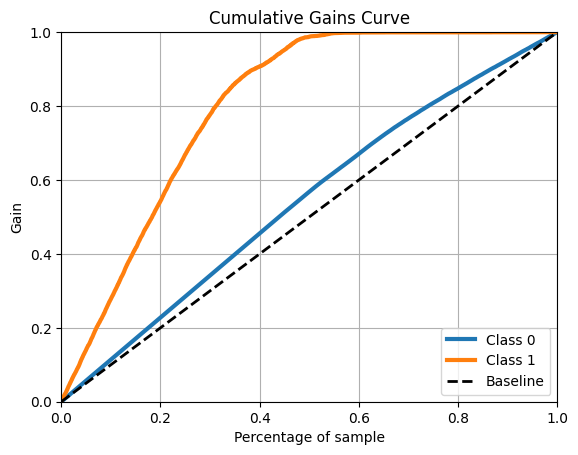

In [788]:
skplt.metrics.plot_cumulative_gain(y_val, y_pred_lr)

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

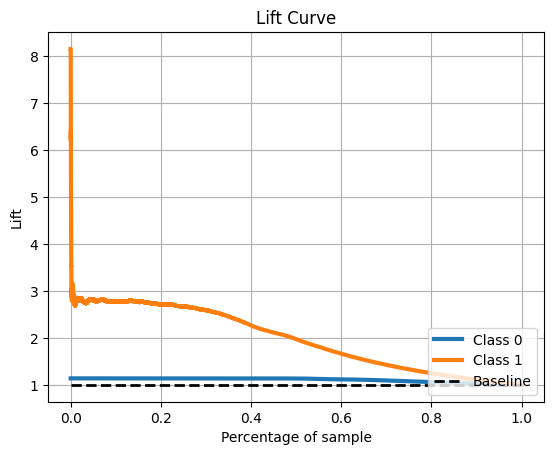

In [789]:
skplt.metrics.plot_lift_curve(y_val, y_pred_lr)

## Decision Tree

### Treinamento e previsão

In [791]:
# Instanciamento do modelo

dtc = DecisionTreeClassifier()


# Treinamento do modelo

dtc.fit(x_train, y_train)


# Previsão do modelo

y_pred_dt = dtc.predict_proba(x_val)

### Performance

#### Precision@K

In [862]:
# Criação do dataframe para calcular métricas de performance @k

df_performance = df_val[['id', 'response']]


# Junção do pred_propensity do modelo para o dataframe

df_performance['pred_propensity'] = y_pred_dt[:, 1].tolist()


# Ordenação do dataframe do maior para o menor propensity_score

df_performance = df_performance.sort_values('pred_propensity', ascending=False)


# Resete do index

df_performance = df_performance.reset_index( drop=True )


# Criação da coluna ranking

df_performance['ranking'] = df_performance.index + 1


# Cálculo da precision @k

df_performance['precision_at_k'] = df_performance['response'].cumsum() / df_performance['ranking']


# Seleção da linha com a precision@k para k=2000

precision_at_k_dt = df_performance.loc[2000, 'precision_at_k']

#### Curva de Ganho e Lift

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

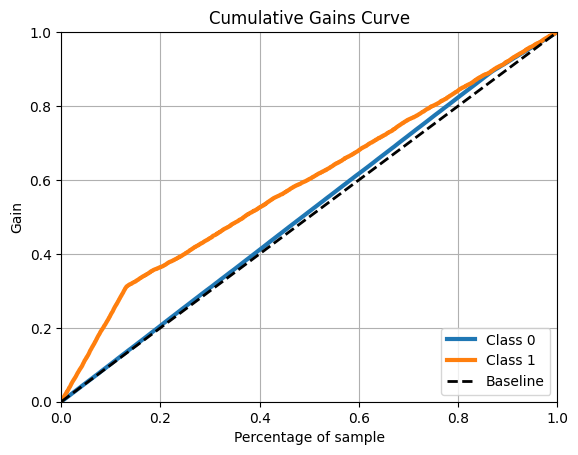

In [794]:
skplt.metrics.plot_cumulative_gain(y_val, y_pred_dt)

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

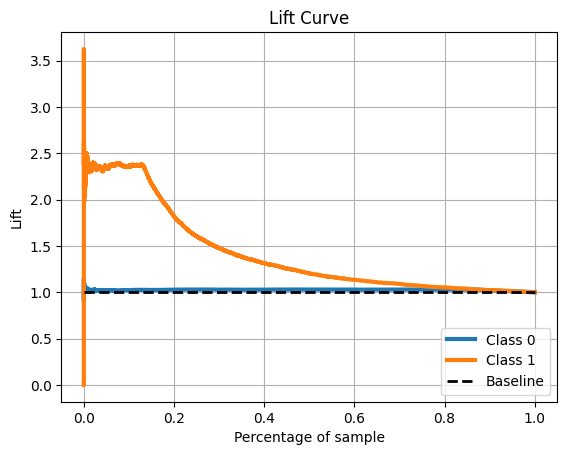

In [795]:
skplt.metrics.plot_lift_curve(y_val, y_pred_dt)

## Random Forest

### Treinamento e previsão

In [796]:
# Instanciamento do modelo

rfc = RandomForestClassifier()


# Treinamento do modelo

rfc.fit(x_train, y_train)


# Previsão do modelo

y_pred_rf = rfc.predict_proba(x_val)

### Performance

#### Precision@K

In [860]:
# Criação do dataframe para calcular métricas de performance @k

df_performance = df_val[['id', 'response']]


# Junção do pred_propensity do modelo para o dataframe

df_performance['pred_propensity'] = y_pred_rf[:, 1].tolist()


# Ordenação do dataframe do maior para o menor propensity_score

df_performance = df_performance.sort_values('pred_propensity', ascending=False)


# Resete do index

df_performance = df_performance.reset_index( drop=True )


# Criação da coluna ranking

df_performance['ranking'] = df_performance.index + 1


# Cálculo da precision @k

df_performance['precision_at_k'] = df_performance['response'].cumsum() / df_performance['ranking']


# Seleção da linha com a precision@k para k=2000

precision_at_k_rf = df_performance.loc[2000, 'precision_at_k']

#### Curva de Ganho e Lift

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

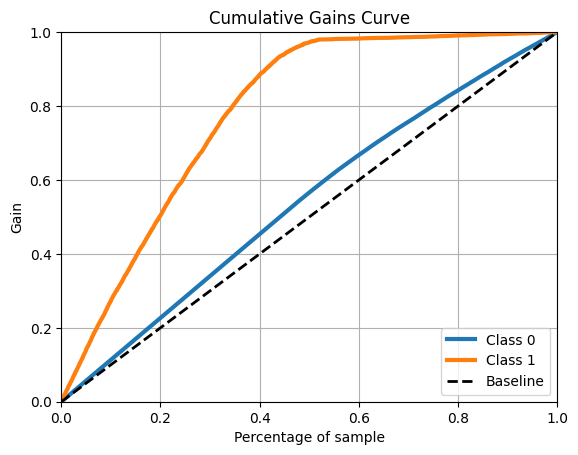

In [799]:
skplt.metrics.plot_cumulative_gain(y_val, y_pred_rf)

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

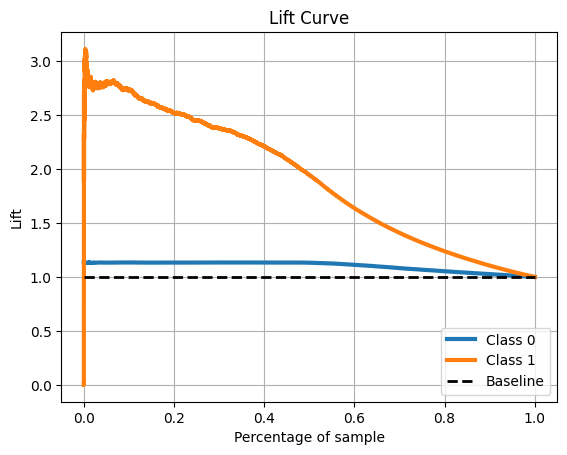

In [800]:
skplt.metrics.plot_lift_curve(y_val, y_pred_rf)

## Support Vector Machine

### Treinamento e previsão

In [865]:
# Instanciamento do modelo

svc = SVC()


# Treinamento do modelo

svc.fit(x_train, y_train)


# Previsão do modelo

y_pred_svc = svc.predict_proba(x_val)

AttributeError: predict_proba is not available when  probability=False

### Performance

#### Precision@K

In [866]:
# Criação do dataframe para calcular métricas de performance @k

df_performance = df_val[['id', 'response']]


# Junção do pred_propensity do modelo para o dataframe

df_performance['pred_propensity'] = y_pred_svc[:, 1].tolist()


# Ordenação do dataframe do maior para o menor propensity_score

df_performance = df_performance.sort_values('pred_propensity', ascending=False)


# Resete do index

df_performance = df_performance.reset_index( drop=True )


# Criação da coluna ranking

df_performance['ranking'] = df_performance.index + 1


# Cálculo da precision @k

df_performance['precision_at_k'] = df_performance['response'].cumsum() / df_performance['ranking']


# Seleção da linha com a precision@k para k=2000

precision_at_k_svm = df_performance.loc[2000, 'precision_at_k']

NameError: name 'y_pred_svc' is not defined

#### Curva de Ganho e Lift

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

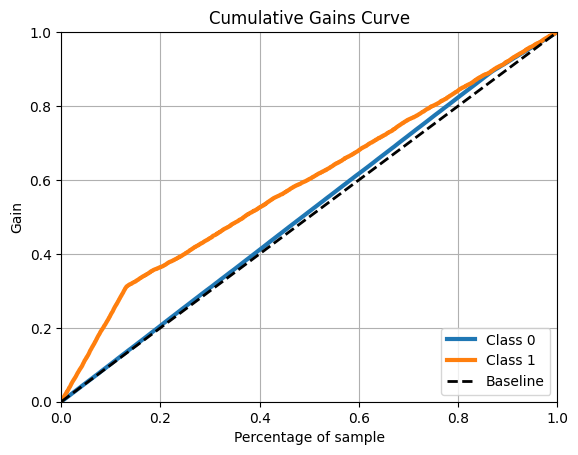

In [794]:
skplt.metrics.plot_cumulative_gain(y_val, y_pred_svc)

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

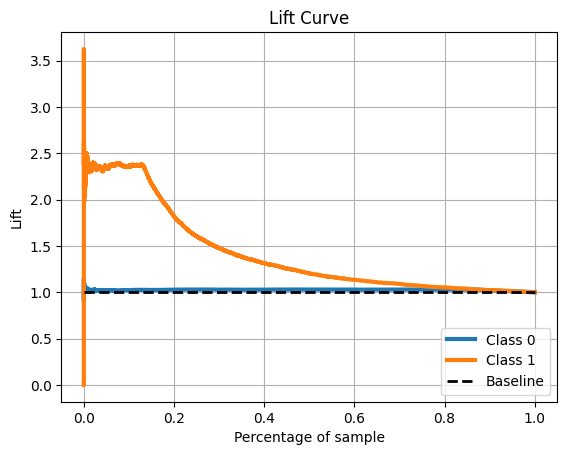

In [795]:
skplt.metrics.plot_lift_curve(y_val, y_pred_svc)

## KNN

### Treinamento e previsão

In [804]:
# Instanciamento do modelo

knn = KNeighborsClassifier()


# Treinamento do modelo

knn.fit(x_train, y_train)


# Previsão do modelo

y_pred_knn = knn.predict_proba(x_val)

### Performance

#### Precision@K

In [858]:
# Criação do dataframe para calcular métricas de performance @k

df_performance = df_val[['id', 'response']]


# Junção do pred_propensity do modelo para o dataframe

df_performance['pred_propensity'] = y_pred_knn[:, 1].tolist()


# Ordenação do dataframe do maior para o menor propensity_score

df_performance = df_performance.sort_values('pred_propensity', ascending=False)


# Resete do index

df_performance = df_performance.reset_index( drop=True )


# Criação da coluna ranking

df_performance['ranking'] = df_performance.index + 1


# Cálculo da precision @k

df_performance['precision_at_k'] = df_performance['response'].cumsum() / df_performance['ranking']


# Seleção da linha com a precision@k para k=2000

precision_at_k_knn = df_performance.loc[2000, 'precision_at_k']

#### Curva de Ganho e Lift

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

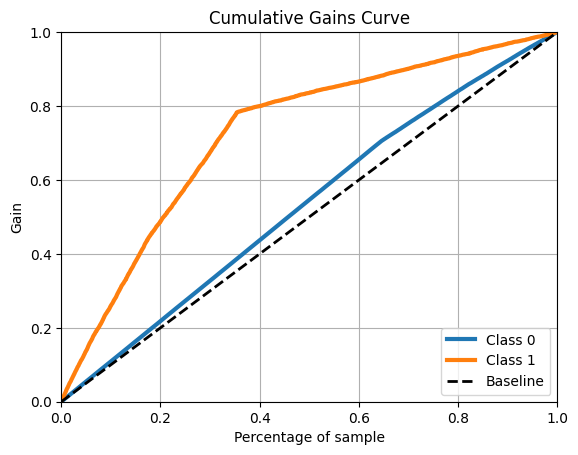

In [807]:
skplt.metrics.plot_cumulative_gain(y_val, y_pred_knn)

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

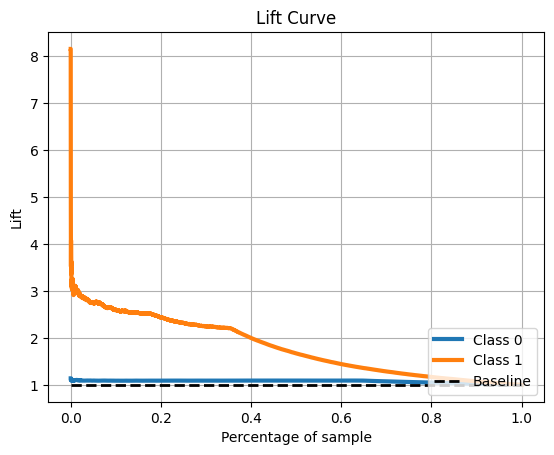

In [808]:
skplt.metrics.plot_lift_curve(y_val, y_pred_knn)

## Naive Bayes

### Treinamento e previsão

In [809]:
# Instanciamento do modelo

gnb = GaussianNB()


# Treinamento do modelo

gnb.fit(x_train, y_train)


# Previsão do modelo

y_pred_nb = gnb.predict_proba(x_val)

### Performance

#### Precision@K

In [856]:
# Criação do dataframe para calcular métricas de performance @k

df_performance = df_val[['id', 'response']]


# Junção do pred_propensity do modelo para o dataframe

df_performance['pred_propensity'] = y_pred_nb[:, 1].tolist()


# Ordenação do dataframe do maior para o menor propensity_score

df_performance = df_performance.sort_values('pred_propensity', ascending=False)


# Resete do index

df_performance = df_performance.reset_index( drop=True )


# Criação da coluna ranking

df_performance['ranking'] = df_performance.index + 1


# Cálculo da precision @k

df_performance['precision_at_k'] = df_performance['response'].cumsum() / df_performance['ranking']


# Seleção da linha com a precision@k para k=2000

precision_at_k_nb = df_performance.loc[2000, 'precision_at_k']

#### Curva de Ganho e Lift

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

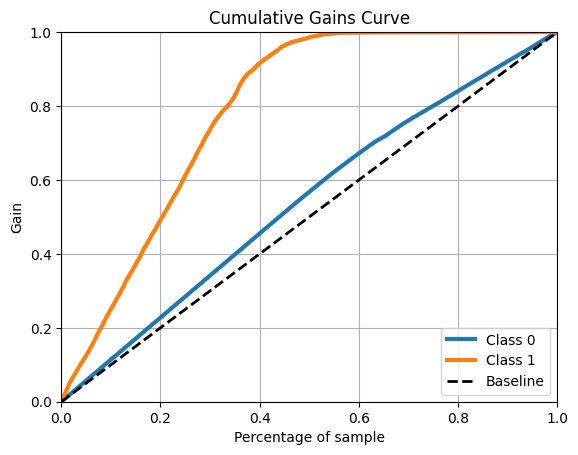

In [811]:
skplt.metrics.plot_cumulative_gain(y_val, y_pred_nb)

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

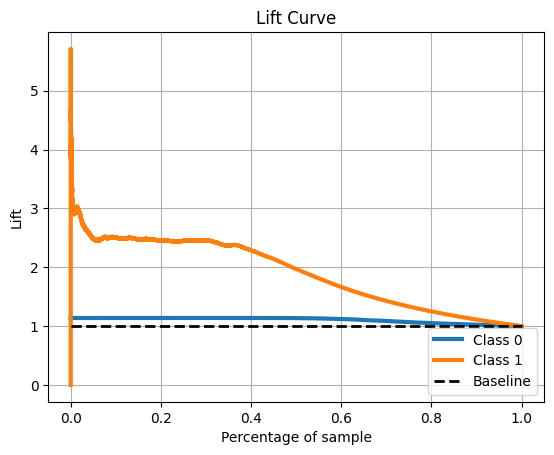

In [812]:
skplt.metrics.plot_lift_curve(y_val, y_pred_nb)

## XGBoost

### Treinamento e previsão

In [814]:
# Instanciamento do modelo

xgb = XGBClassifier()


# Treinamento do modelo

xgb.fit(x_train, y_train)


# Previsão do modelo

y_pred_xgb = xgb.predict_proba(x_val)

### Performance

#### Precision@K

In [842]:
# Criação do dataframe para calcular métricas de performance @k

df_performance = df_val[['id', 'response']]


# Junção do pred_propensity do modelo para o dataframe

df_performance['pred_propensity'] = y_pred_xgb[:, 1].tolist()


# Ordenação do dataframe do maior para o menor propensity_score

df_performance = df_performance.sort_values('pred_propensity', ascending=False)


# Resete do index

df_performance = df_performance.reset_index( drop=True )


# Criação da coluna ranking

df_performance['ranking'] = df_performance.index + 1


# Cálculo da precision @k

df_performance['precision_at_k'] = df_performance['response'].cumsum() / df_performance['ranking']


# Seleção da linha com a precision@k para k=2000

precision_at_k_xgb = df_performance.loc[2000, 'precision_at_k']

#### Curva de Ganho e Lift

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

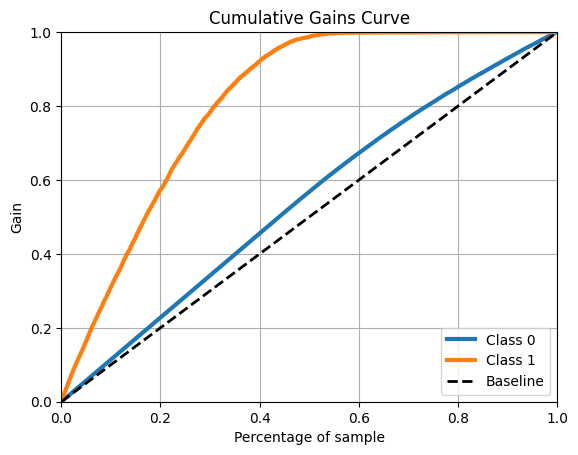

In [819]:
skplt.metrics.plot_cumulative_gain(y_val, y_pred_xgb)

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

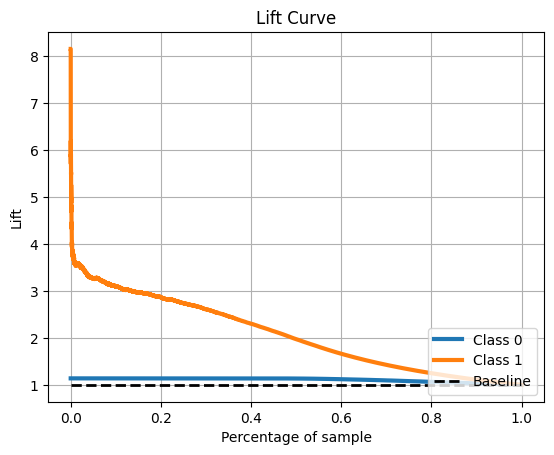

In [820]:
skplt.metrics.plot_lift_curve(y_val, y_pred_xgb)

# 11 - Comparação de performance e seleção do melhor modelo

## Comparação de performance 

In [848]:
# Algoritmos escolhidos para criar os modelos

MLA = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    XGBClassifier()
    ]

In [850]:
# Cálculo das métricas padrão para avaliar algoritmos de classificação

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    
    y_pred = alg.fit(x_train, y_train).predict(x_val)
    fp, tp, th = roc_curve(y_val, y_pred)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Modelo'] = MLA_name
    MLA_compare.loc[row_index, 'Acurácia'] = round(accuracy_score(y_val, y_pred), 4)
    MLA_compare.loc[row_index, 'Precisão'] = round(precision_score(y_val, y_pred), 4)
    MLA_compare.loc[row_index, 'Recall'] = round(recall_score(y_val, y_pred), 4)
    MLA_compare.loc[row_index, 'F1 Score'] = round(f1_score(y_val, y_pred), 4)
    MLA_compare.loc[row_index, 'AUC'] = round(roc_auc_score(y_val, y_pred), 4)

    row_index+=1
    
MLA_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)    
MLA_compare


# Cálculo das métricas precision@k para avaliar algoritmos de classificação em problemas de rankeamento

MLA_compare.loc[MLA_compare['Modelo'] == 'GaussianNB', 'Precision@K'] = precision_at_k_nb

MLA_compare.loc[MLA_compare['Modelo'] == 'DecisionTreeClassifier', 'Precision@K'] = precision_at_k_dt

MLA_compare.loc[MLA_compare['Modelo'] == 'KNeighborsClassifier', 'Precision@K'] = precision_at_k_knn

MLA_compare.loc[MLA_compare['Modelo'] == 'RandomForestClassifier', 'Precision@K'] = precision_at_k_rf

MLA_compare.loc[MLA_compare['Modelo'] == 'XGBClassifier', 'Precision@K'] = precision_at_k_xgb

MLA_compare.loc[MLA_compare['Modelo'] == 'LogisticRegression', 'Precision@K'] = precision_at_k_lr


# Ordenação da maior para a menor métrica de precision@k com k=2000

MLA_compare.sort_values('Precision@K', ascending=False)

,Modelo,Acurácia,Precisão,Recall,F1 Score,AUC,Precision@K
5,XGBClassifier,0.8767,0.4531,0.0274,0.0517,0.5114,0.428286
3,KNeighborsClassifier,0.8559,0.3361,0.1797,0.2342,0.5651,0.351824
0,LogisticRegression,0.8769,0.3681,0.0057,0.0112,0.5022,0.343328
2,RandomForestClassifier,0.8614,0.3470,0.1487,0.2082,0.5548,0.342829
4,GaussianNB,0.7114,0.2848,0.8966,0.4323,0.7911,0.334833
1,DecisionTreeClassifier,0.8231,0.2885,0.3023,0.2953,0.5991,0.303848


## Modelo selecionado

O modelo selecionado foi o **XGB Classifier** porque dentre todos os modelos este foi o que apresentou a **melhor métrica de Precision@K** com k=2000

Essa métrica é a mais indicada para avaliar os modelos neste problema de negócio em específico porque ela indica **qual dos modelos ordena com maior eficiência a propensão de compra dos clientes**

# 12 - Otimização de hiperparâmetros

## Busca dos melhores hiperparâmetros

In [875]:
# Definição dos hiperparâmetros a serem testados

parametros = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
}


# Instanciamento do modelo

xgb_model = XGBClassifier()


# Instanciamento do random search

random_search = RandomizedSearchCV(xgb_model, param_distributions=parametros, n_iter=15, cv=5, scoring='precision')


# Treinamento do random search

random_search.fit(x_train, y_train)


# Impressão do melhor conjunto de hiperparâmetros e seu respectivo precision_score

print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.06826941617139552, 'max_depth': 5, 'n_estimators': 107, 'subsample': 0.5675639234950941}
Best score:  0.6624375624375625


## Definição dos melhores hiperparâmetros

In [954]:
parametros_otimizados = {
                'learning_rate': 0.06826941617139552, 
                'max_depth': 5, 
                'n_estimators': 107, 
                'subsample': 0.5675639234950941, 
                }

## Treinamento do modelo com hiperparâmetros otimizados

In [955]:
# Instanciamento do modelo

xgb_otimizado = XGBClassifier(learning_rate=parametros_otimizados['learning_rate'], 
                          max_depth=parametros_otimizados['max_depth'], 
                          n_estimators=parametros_otimizados['n_estimators'], 
                          subsample = parametros_otimizados['subsample'])


# Treinamento do modelo

xgb_otimizado.fit(x_train, y_train)


# Previsão do modelo

y_pred_xgb_otimizado = xgb_otimizado.predict_proba(x_val)

# 13 - Análise de performance do modelo final

## Precision@K

In [956]:
# Criação do dataframe para calcular métricas de performance @k

df_performance = df_val[['id', 'response']]


# Junção do pred_propensity do modelo para o dataframe

df_performance['pred_propensity'] = y_pred_xgb_otimizado[:, 1].tolist()


# Ordenação do dataframe do maior para o menor propensity_score

df_performance = df_performance.sort_values('pred_propensity', ascending=False)


# Resete do index

df_performance = df_performance.reset_index( drop=True )


# Criação da coluna ranking

df_performance['ranking'] = df_performance.index + 1


# Cálculo da precision @k

df_performance['precision_at_k'] = df_performance['response'].cumsum() / df_performance['ranking']


# Seleção da linha com a precision@k para k=2000

df_performance.loc[2000, 'precision_at_k']

0.4407796101949025

## Curva de Ganho e Lift

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

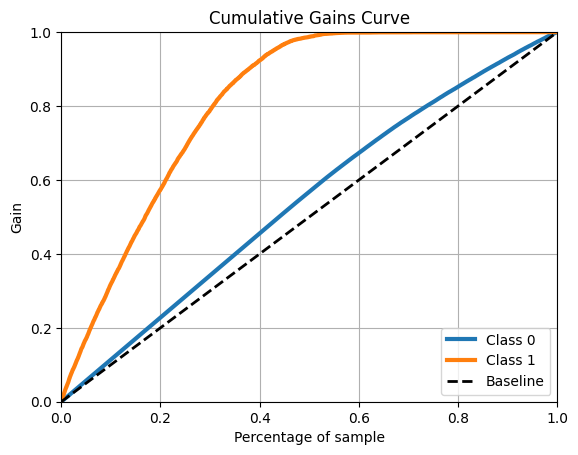

In [900]:
skplt.metrics.plot_cumulative_gain(y_val, y_pred_xgb_otimizado)

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

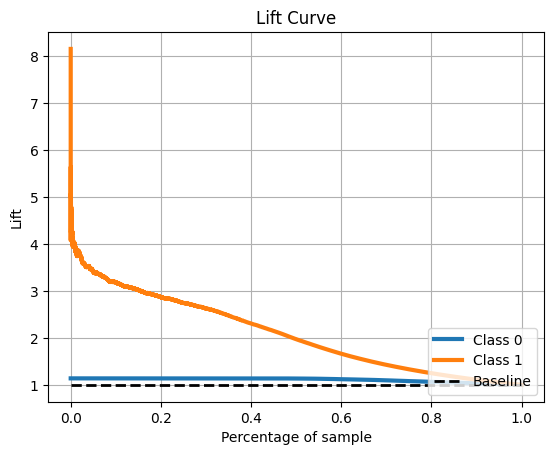

In [901]:
skplt.metrics.plot_lift_curve(y_val, y_pred_xgb_otimizado)

## Retorno de Investimento

# 14 - Implantação do modelo em produção

## Serialização

### Modelo

In [ ]:
pickle.dump( xgb_otimizado, open( "C:\\Users\\victo\\repos\\comunidade_ds\\pa_health_insurance_cross_sell\\models\\xgb_model.pkl", 'wb' ) )

### Features

#### Codificadores

In [1156]:
#Codificação da variável "gender" com o método mean encoding

pickle.dump( gender_mean_encoding, open( '../src/features/gender_encoding.pkl', 'wb' ) )


#Codificação da variável "vehicle_damage" com o método mean encoding

pickle.dump( vehicle_damage_mean_encoding, open( '../src/features/vehicle_damage_encoding.pkl', 'wb' ) )


#Codificação da variável "vehicle_age" com o método ordinal encoding

pickle.dump( oe, open( '../src/features/vehicle_age_encoding.pkl', 'wb' ) )


#Codificação da variável "region_code" com o método mean encoding

pickle.dump( region_code_mean_encoding, open( '../src/features/region_code_encoding.pkl', 'wb' ) )


#Codificação da variável "policy_sales_channel" com o método mean encoding

pickle.dump( policy_sales_channel_mean_encoding, open( '../src/features/policy_sales_channel_encoding.pkl', 'wb' ) )

#### Reescaladores

In [980]:
#Reescala da variável "age" com o método minmaxscaler

pickle.dump( mms_age, open( '../src/features/age_scaler.pkl', 'wb' ) )


#Reescala da variável "annual_premium" com o método minmaxscaler

pickle.dump(mms_annual_premium, open( '../src/features/annual_premium_scaler.pkl', 'wb' ) )


#Reescala da variável "vintage" com o método minmaxscaler

pickle.dump(mms_vintage, open( '../src/features/vintage_scaler.pkl', 'wb' ) )

## Criação da classe do modelo

In [1047]:
import pickle
import numpy  as np
import pandas as pd


class HealthInsurance:
    
    def __init__( self ):
        self.home_path = 'C:\\Users\\victo\\repos\\comunidade_ds\\pa_health_insurance_cross_sell\\'
        self.gender_encoding = pickle.load( open( self.home_path + 'src\\features\\gender_encoding.pkl', 'rb' ) )
        self.vehicle_damage_encoding = pickle.load( open( self.home_path + 'src\\features\\vehicle_damage_encoding.pkl', 'rb' ) ) 
        self.vehicle_age_encoding = pickle.load( open( self.home_path + 'src\\features\\vehicle_age_encoding.pkl', 'rb' ) )
        self.region_code_encoding = pickle.load( open( self.home_path + 'src\\features\\region_code_encoding.pkl', 'rb' ) )
        self.policy_sales_channel_encoding = pickle.load( open( self.home_path + 'src\\features\\policy_sales_channel_encoding.pkl', 'rb' ) )
        self.age_scaler = pickle.load( open( self.home_path + 'src\\features\\age_scaler.pkl', 'rb' ) )
        self.annual_premium_scaler = pickle.load( open( self.home_path + 'src\\features\\annual_premium_scaler.pkl', 'rb' ) )
        self.vintage_scaler = pickle.load( open( self.home_path + 'src\\features\\vintage_scaler.pkl', 'rb' ) )
        
        
    def data_cleaning (self, df2):
        
        # Renomeação de colunas
        
        new_columns_name = ['id', 'gender', 'age', 'driving_license', 'region_code', 'previously_insured', 'vehicle_age', 
            'vehicle_damage', 'annual_premium', 'policy_sales_channel', 'vintage']

        df2.columns = new_columns_name
        
        
        return df2
    
    
    
    def data_preparation (self, df_train):
        
        # Codificações
        
        df_train['gender'] =  df_train['gender'].map(self.gender_encoding)
        
        df_train['vehicle_damage'] =  df_train['vehicle_damage'].map(self.vehicle_damage_encoding)

        df_train["vehicle_age"] = self.vehicle_age_encoding.transform(df_train[["vehicle_age"]])
        
        df_train['region_code'] =  df_train['region_code'].map(self.region_code_encoding)
        
        df_train['policy_sales_channel'] =  df_train['policy_sales_channel'].map(self.policy_sales_channel_encoding)
        
        
        # Reescalas
        
        df_train["age"] = self.age_scaler.transform(df_train[["age"]])
        
        df_train["annual_premium"] = self.annual_premium_scaler.transform(df_train[["annual_premium"]])
        
        df_train["vintage"] = self.vintage_scaler.transform(df_train[["vintage"]])
        
        
        # Seleção de features

        features_selected = ['previously_insured', 'vehicle_damage', 'vehicle_age', 'age', 'annual_premium', 'vintage', 'policy_sales_channel']
        
        
        return df_train[features_selected]
        
        

    def get_prediction (self, model, original_data, test_data):
        
        # Predição do modelo
        
        pred = model.predict_proba(test_data)[:,1]
        
        
        # Junção da predição aos dados originais
        
        original_data['score'] = pred
        
        
        return original_data.to_json( orient='records', date_format='iso' )

## Desenvolvimento da API

In [1071]:
import pickle
import pandas as pd
from flask import Flask, request, Response
from models.HealthInsurance import HealthInsurance


# Carregamento do modelo

path = 'C:\\Users\\victo\\repos\\comunidade_ds\\pa_health_insurance_cross_sell\\'
model = pickle.load( open( path + 'models\\xgb_model.pkl', 'rb' ) )


# Inicialização da API

app = Flask( __name__ )

@app.route( '/predict', methods=['POST'] )

def health_insurance_predict():
    
    test_json = request.get_json()
    
    if test_json: # there is data
        if isinstance( test_json, dict ): # unique example
            test_raw = pd.DataFrame( test_json, index=[0] )
            
        else: # multiple example
            test_raw = pd.DataFrame( test_json, columns=test_json[0].keys() )
            
        # Instanciamento da classe
        pipeline = HealthInsurance()
        
        # Limpeza dos dados
        df1 = pipeline.data_cleaning(test_raw)
        
        # Preparação dos dados
        df2 = pipeline.data_preparation(df1)
        
        # Predição do modelo
        df_response = pipeline.get_prediction( model, test_raw, df2 )
        
        return df_response
    
    else:
        return Response( '{}', status=200, mimetype='application/json' )
    
if __name__ == '__main__':
    app.run( '0.0.0.0', debug=True )

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.0.15:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

## Teste

### Modelo em produção na nuvem

In [109]:
# Criação dos dados

df_test = pd.read_csv ("C:\\Users\\victo\\repos\\comunidade_ds\\pa_health_insurance_cross_sell\\data\\raw\\test.csv")

df_test = df_test.sample(15)


# Conversão dos dados em JSON

data = json.dumps( df_test.to_dict( orient='records' ) )


# Requisição da API

# url = 'http://127.0.0.1:5000/predict'
url = 'https://health-insurance-cross-sell-dvkh.onrender.com/predict'
header = {'Content-type': 'application/json' }

r = requests.post( url, data=data, headers=header )
print( 'Status Code {}'.format( r.status_code ) )


# Recebimento dos dados e ordenação pelo score

d1 = pd.DataFrame( r.json(), columns=r.json()[0].keys() )
d1.sort_values( 'score', ascending=False ).head(15)

Status Code 502


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

### Requisição pelo google sheets

In [56]:
df_test = pd.read_csv ("C:\\Users\\victo\\repos\\comunidade_ds\\pa_health_insurance_cross_sell\\data\\raw\\test.csv")
df_test = df_test.sample(50, random_state=42)
df_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
110614,491724,Female,36,1,29.0,0,1-2 Year,Yes,2630.0,156.0,56
87053,468163,Female,43,1,21.0,0,1-2 Year,Yes,32003.0,124.0,162
38340,419450,Male,22,1,28.0,1,< 1 Year,No,31631.0,160.0,128
3200,384310,Male,25,1,50.0,1,< 1 Year,No,31831.0,152.0,262
3896,385006,Male,33,1,41.0,1,< 1 Year,No,38284.0,152.0,256
98769,479879,Female,22,1,8.0,0,1-2 Year,Yes,61626.0,124.0,120
13846,394956,Female,28,1,30.0,1,< 1 Year,No,25345.0,152.0,244
60311,441421,Male,52,1,20.0,0,> 2 Years,Yes,2630.0,26.0,264
963,382073,Male,25,1,11.0,1,< 1 Year,No,32819.0,152.0,298
95290,476400,Male,60,1,8.0,1,1-2 Year,Yes,2630.0,26.0,164


In [ ]:
data = json.dumps( df_test.to_dict( orient='records' ) )

url = 'https://health-insurance-cross-sell-dvkh.onrender.com/predict'
header = {'Content-type': 'application/json' }

r = requests.post( url, data=data, headers=header )
print( 'Status Code {}'.format( r.status_code ) )

d1 = pd.DataFrame( r.json(), columns=r.json()[0].keys() )

d1